In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Read in all the data from each subreddit and time interval

# AnxietyRedditData
PreCovidAnxietyRedditData = pd.read_csv('/content/PreCovidAnxietyRedditData.csv')
PreCovidAnxietyRedditData = PreCovidAnxietyRedditData.reset_index().rename(columns={'index': 'ID'})
DuringCovidAnxietyRedditData = pd.read_csv('/content/DuringCovidAnxietyRedditData.csv')
DuringCovidAnxietyRedditData = DuringCovidAnxietyRedditData.reset_index().rename(columns={'index': 'ID'})
PostCovidAnxietyRedditData = pd.read_csv('/content/PostCovidAnxietyRedditData.csv')
PostCovidAnxietyRedditData = PostCovidAnxietyRedditData.reset_index().rename(columns={'index': 'ID'})

# Combine Anxiety Data
AllAnxietyData = pd.concat(
    map(pd.read_csv, ['/content/DuringCovidAnxietyRedditData.csv', '/content/DuringCovidAnxietyRedditData.csv', '/content/PostCovidAnxietyRedditData.csv']), ignore_index=True)

AllAnxietyData = AllAnxietyData.reset_index().rename(columns={'index': 'ID'})

# DepressionRedditData
PreCovidDepressionRedditData = pd.read_csv('/content/PreCovidDepressionRedditData.csv')
PreCovidDepressionRedditData = PreCovidDepressionRedditData.reset_index().rename(columns={'index': 'ID'})
DuringCovidDepressionRedditData = pd.read_csv('/content/DuringCovidDepressionRedditData.csv')
DuringCovidDepressionRedditData = DuringCovidDepressionRedditData.reset_index().rename(columns={'index': 'ID'})
PostCovidDepressionRedditData = pd.read_csv('/content/PostCovidDepressionRedditData.csv')
PostCovidDepressionRedditData = PostCovidDepressionRedditData.reset_index().rename(columns={'index': 'ID'})

# MentalHealthRedditData
PreCovidMentalHealthRedditData = pd.read_csv('/content/PreCovidMentalHealthRedditData.csv')
PreCovidMentalHealthRedditData = PreCovidMentalHealthRedditData.reset_index().rename(columns={'index': 'ID'})
DuringCovidMentalHealthRedditData = pd.read_csv('/content/DuringCovidMentalHealthRedditData.csv')
DuringCovidMentalHealthRedditData = DuringCovidMentalHealthRedditData.reset_index().rename(columns={'index': 'ID'})
PostCovidMentalHealthRedditData = pd.read_csv('/content/PostCovidMentalHealthRedditData.csv')
PostCovidMentalHealthRedditData = PostCovidMentalHealthRedditData.reset_index().rename(columns={'index': 'ID'})

In [24]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from tqdm.notebook import tqdm
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [26]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [27]:
# Run for Roberta Model for AnxietyRedditData Titles and Content
PreCovidAnxietyRedditDataTitle = {}
PreCovidAnxietyRedditDataContent = {}

DuringCovidAnxietyRedditDataTitle = {}
DuringCovidAnxietyRedditDataContent = {}

PostCovidAnxietyRedditDataTitle = {}
PostCovidAnxietyRedditDataContent = {}

AllAnxietyRedditDataTitle = {}
AllAnxietyRedditDataContent = {}

for i, row in tqdm(AllAnxietyData.iterrows(), total=len(AllAnxietyData)):
    try:
        title = str(row['Title'])
        AllAnxietyRedditDataTitle[i] = polarity_scores_roberta(title)
    except RuntimeError:
        print(f'Broke for Title id {i}')
    try:
        content = str(row['Content'])
        AllAnxietyRedditDataContent[i] = polarity_scores_roberta(content)
    except RuntimeError:
        print(f'Broke for Content id {i}')

for i, row in tqdm(PreCovidAnxietyRedditData.iterrows(), total=len(PreCovidAnxietyRedditData)):
    try:
        preTitle = str(row['Title'])
        PreCovidAnxietyRedditDataTitle[i] = polarity_scores_roberta(preTitle)
    except RuntimeError:
        print(f'Broke for Pre Title id {i}')
    try:
        preContent = str(row['Content'])
        PreCovidAnxietyRedditDataContent[i] = polarity_scores_roberta(preContent)
    except RuntimeError:
        print(f'Broke for Pre Content id {i}')

for j, row in tqdm(DuringCovidAnxietyRedditData.iterrows(), total=len(DuringCovidAnxietyRedditData)):
    try:
        duringTitle = str(row['Title'])
        DuringCovidAnxietyRedditDataTitle[j] = polarity_scores_roberta(duringTitle)
    except RuntimeError:
        print(f'Broke for During Title id {j}')
    try:
        duringContent = str(row['Content'])
        DuringCovidAnxietyRedditDataContent[j] = polarity_scores_roberta(duringContent)
    except RuntimeError:
        print(f'Broke for During Content id {j}')

for k, row in tqdm(PostCovidAnxietyRedditData.iterrows(), total=len(PostCovidAnxietyRedditData)):
    try:
        postTitle = str(row['Title'])
        PostCovidAnxietyRedditDataTitle[k] = polarity_scores_roberta(postTitle)
    except RuntimeError:
        print(f'Broke for Post Title id {k}')
    try:
        postContent = str(row['Content'])
        PostCovidAnxietyRedditDataContent[k] = polarity_scores_roberta(postContent)
    except RuntimeError:
        print(f'Broke for Post Content id {k}')

  0%|          | 0/883 [00:00<?, ?it/s]

Broke for Content id 50
Broke for Content id 55
Broke for Content id 69
Broke for Content id 95
Broke for Content id 113
Broke for Content id 125
Broke for Content id 143
Broke for Content id 147
Broke for Content id 226
Broke for Content id 266
Broke for Content id 269
Broke for Content id 294
Broke for Content id 387
Broke for Content id 392
Broke for Content id 406
Broke for Content id 432
Broke for Content id 450
Broke for Content id 462
Broke for Content id 480
Broke for Content id 484
Broke for Content id 563
Broke for Content id 603
Broke for Content id 606
Broke for Content id 631
Broke for Content id 692
Broke for Content id 705
Broke for Content id 747
Broke for Content id 758
Broke for Content id 801
Broke for Content id 824
Broke for Content id 838
Broke for Content id 842
Broke for Content id 851
Broke for Content id 858


  0%|          | 0/227 [00:00<?, ?it/s]

Broke for Pre Content id 81
Broke for Pre Content id 113
Broke for Pre Content id 125
Broke for Pre Content id 141
Broke for Pre Content id 163
Broke for Pre Content id 178
Broke for Pre Content id 194


  0%|          | 0/337 [00:00<?, ?it/s]

Broke for During Content id 50
Broke for During Content id 55
Broke for During Content id 69
Broke for During Content id 95
Broke for During Content id 113
Broke for During Content id 125
Broke for During Content id 143
Broke for During Content id 147
Broke for During Content id 226
Broke for During Content id 266
Broke for During Content id 269
Broke for During Content id 294


  0%|          | 0/209 [00:00<?, ?it/s]

Broke for Post Content id 18
Broke for Post Content id 31
Broke for Post Content id 73
Broke for Post Content id 84
Broke for Post Content id 127
Broke for Post Content id 150
Broke for Post Content id 164
Broke for Post Content id 168
Broke for Post Content id 177
Broke for Post Content id 184


In [28]:
preAnxietyTitle = PreCovidAnxietyRedditDataTitle
preAnxietyContent = PreCovidAnxietyRedditDataContent
preAnxietyTitleDF = pd.DataFrame(preAnxietyTitle).T
preAnxietyContentDF = pd.DataFrame(preAnxietyContent).T
preAnxietyTitleDF = preAnxietyTitleDF.reset_index().rename(columns={'index': 'ID'})
preAnxietyContentDF = preAnxietyContentDF.reset_index().rename(columns={'index': 'ID'})
preAnxietyTitleDF = preAnxietyTitleDF.merge(PreCovidAnxietyRedditData, on='ID', how='left')
preAnxietyContentDF = preAnxietyContentDF.merge(PreCovidAnxietyRedditData, on='ID', how='left')

duringAnxietyTitle = DuringCovidAnxietyRedditDataTitle
duringAnxietyContent = DuringCovidAnxietyRedditDataContent
duringAnxietyTitleDF = pd.DataFrame(duringAnxietyTitle).T
duringAnxietyContentDF = pd.DataFrame(duringAnxietyContent).T
duringAnxietyTitleDF = duringAnxietyTitleDF.reset_index().rename(columns={'index': 'ID'})
duringAnxietyContentDF = duringAnxietyContentDF.reset_index().rename(columns={'index': 'ID'})
duringAnxietyTitleDF = duringAnxietyTitleDF.merge(DuringCovidAnxietyRedditData, on='ID', how='left')
duringAnxietyContentDF = duringAnxietyContentDF.merge(DuringCovidAnxietyRedditData, on='ID', how='left')

postAnxietyTitle = PostCovidAnxietyRedditDataTitle
postAnxietyContent = PostCovidAnxietyRedditDataContent
postAnxietyTitleDF = pd.DataFrame(postAnxietyTitle).T
postAnxietyContentDF = pd.DataFrame(postAnxietyContent).T
postAnxietyTitleDF = postAnxietyTitleDF.reset_index().rename(columns={'index': 'ID'})
postAnxietyContentDF = postAnxietyContentDF.reset_index().rename(columns={'index': 'ID'})
postAnxietyTitleDF = postAnxietyTitleDF.merge(PostCovidAnxietyRedditData, on='ID', how='left')
postAnxietyContentDF = postAnxietyContentDF.merge(PostCovidAnxietyRedditData, on='ID', how='left')

preAnxietyTitleDF.head()

,ID,roberta_neg,roberta_neu,roberta_pos,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.010173,0.049017,0.940810,Anxiety,Today I promised myself bacon and eggs if I co...,NaN,Good for you! Whenever I see something with an...,6044,98,2019-03-15 01:55:17,b18zmk
1,1,0.244388,0.598412,0.157200,Anxiety,"Professor here, if you have missed class, plea...","Hello, I’ve read a lot of posts recently about...","Just as an ironic heads-up, I stay up at night...",5206,131,2019-02-20 06:39:13,asl2gr
2,2,0.003054,0.051403,0.945542,Anxiety,"Have my first real, adult, job interview today...",NaN,Fuck yeah! You got this and you're going to ro...,5149,115,2019-02-26 16:08:35,av1397
3,3,0.060216,0.870392,0.069392,Anxiety,Message from your future self,NaN,I really needed to see this today. Thank you.,4747,59,2019-03-19 17:40:14,b30dr2
4,4,0.946909,0.049381,0.003709,Anxiety,1. Anxiety makes it hard to go to sleep 2. Dep...,Just one of the hellish cycles that anxiety ge...,Meeeeeeee. I keep promising myself to switch o...,4608,111,2019-09-16 21:07:27,d56opw


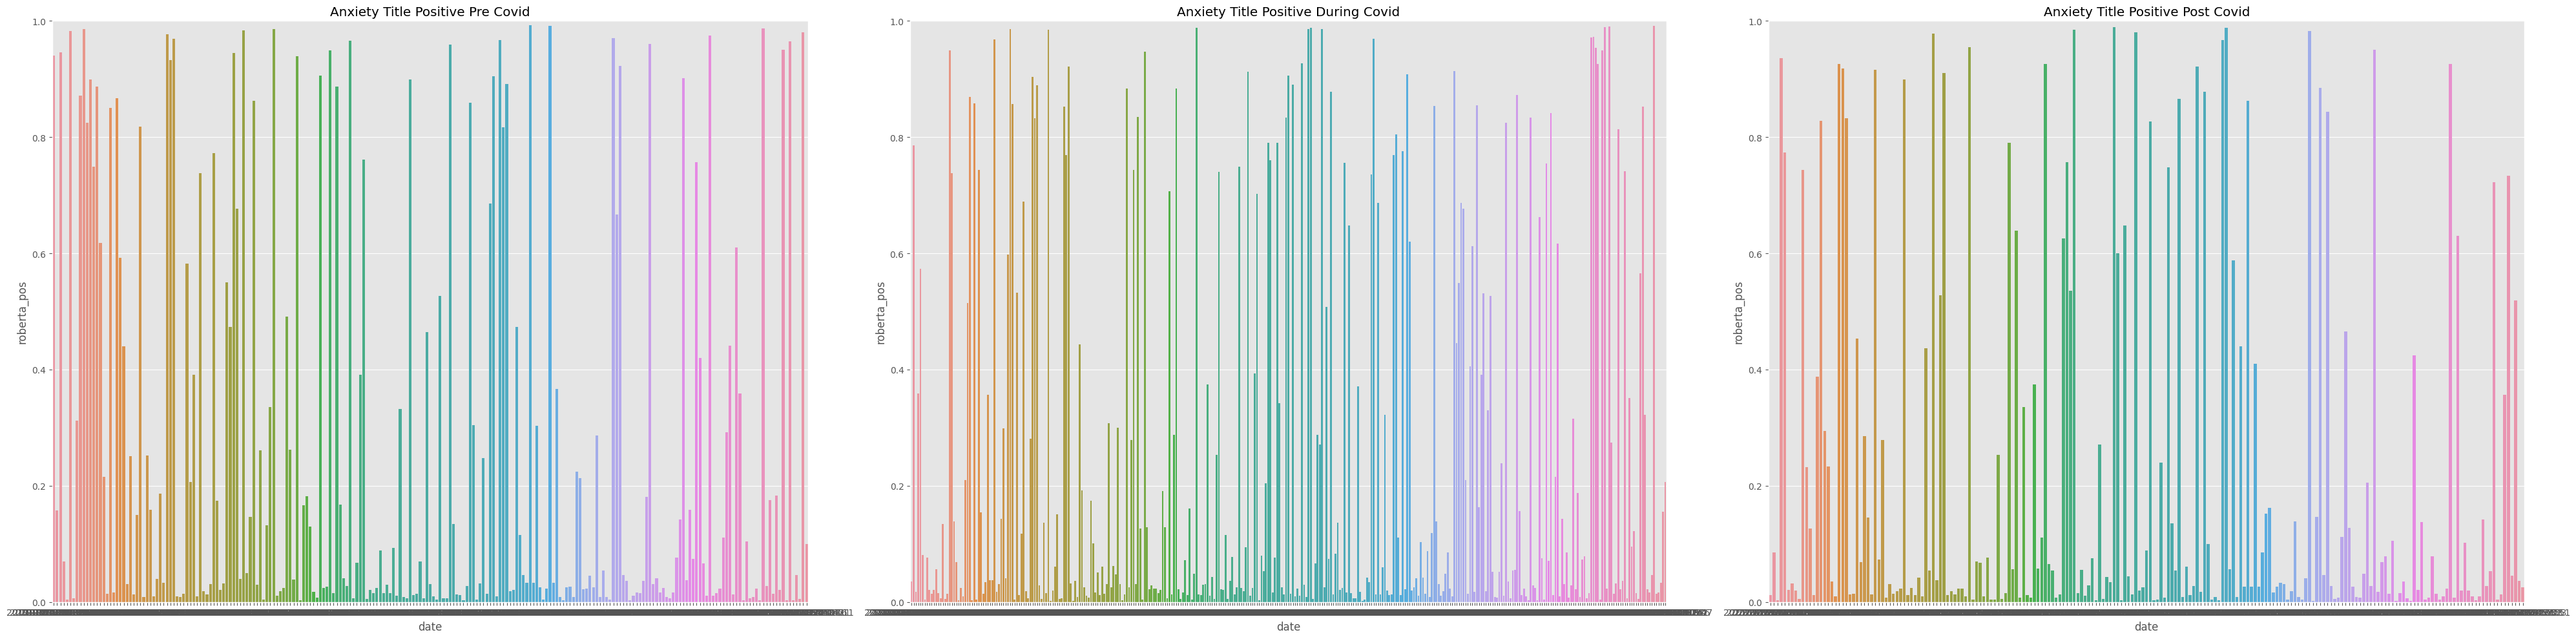

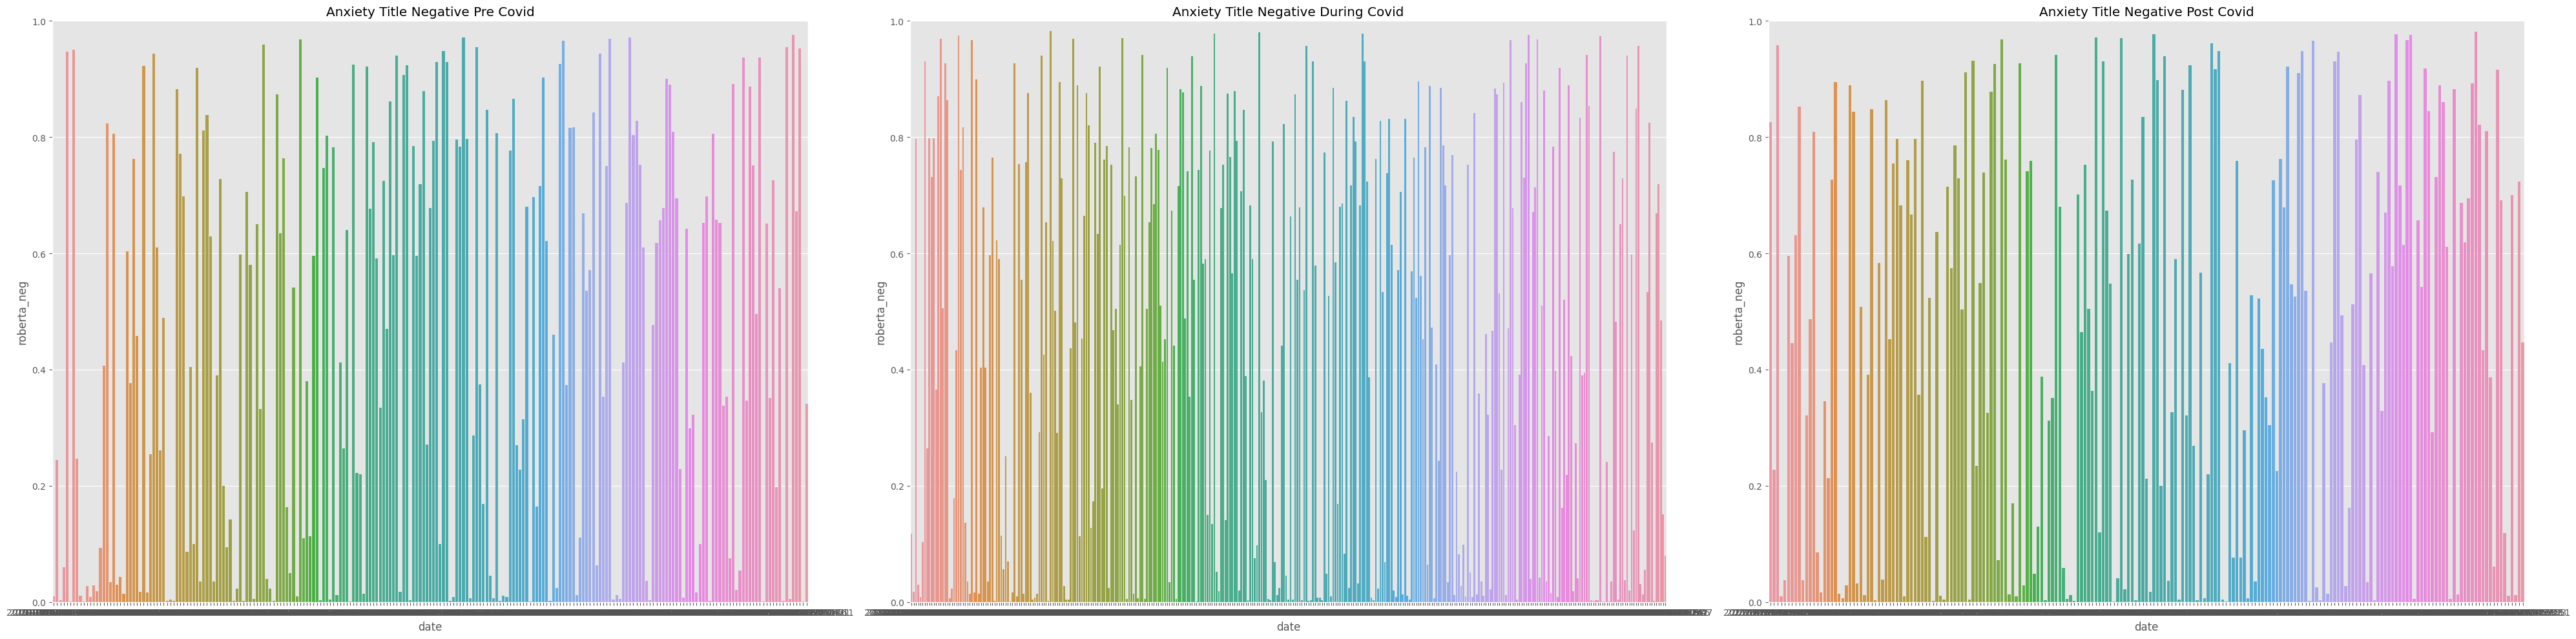

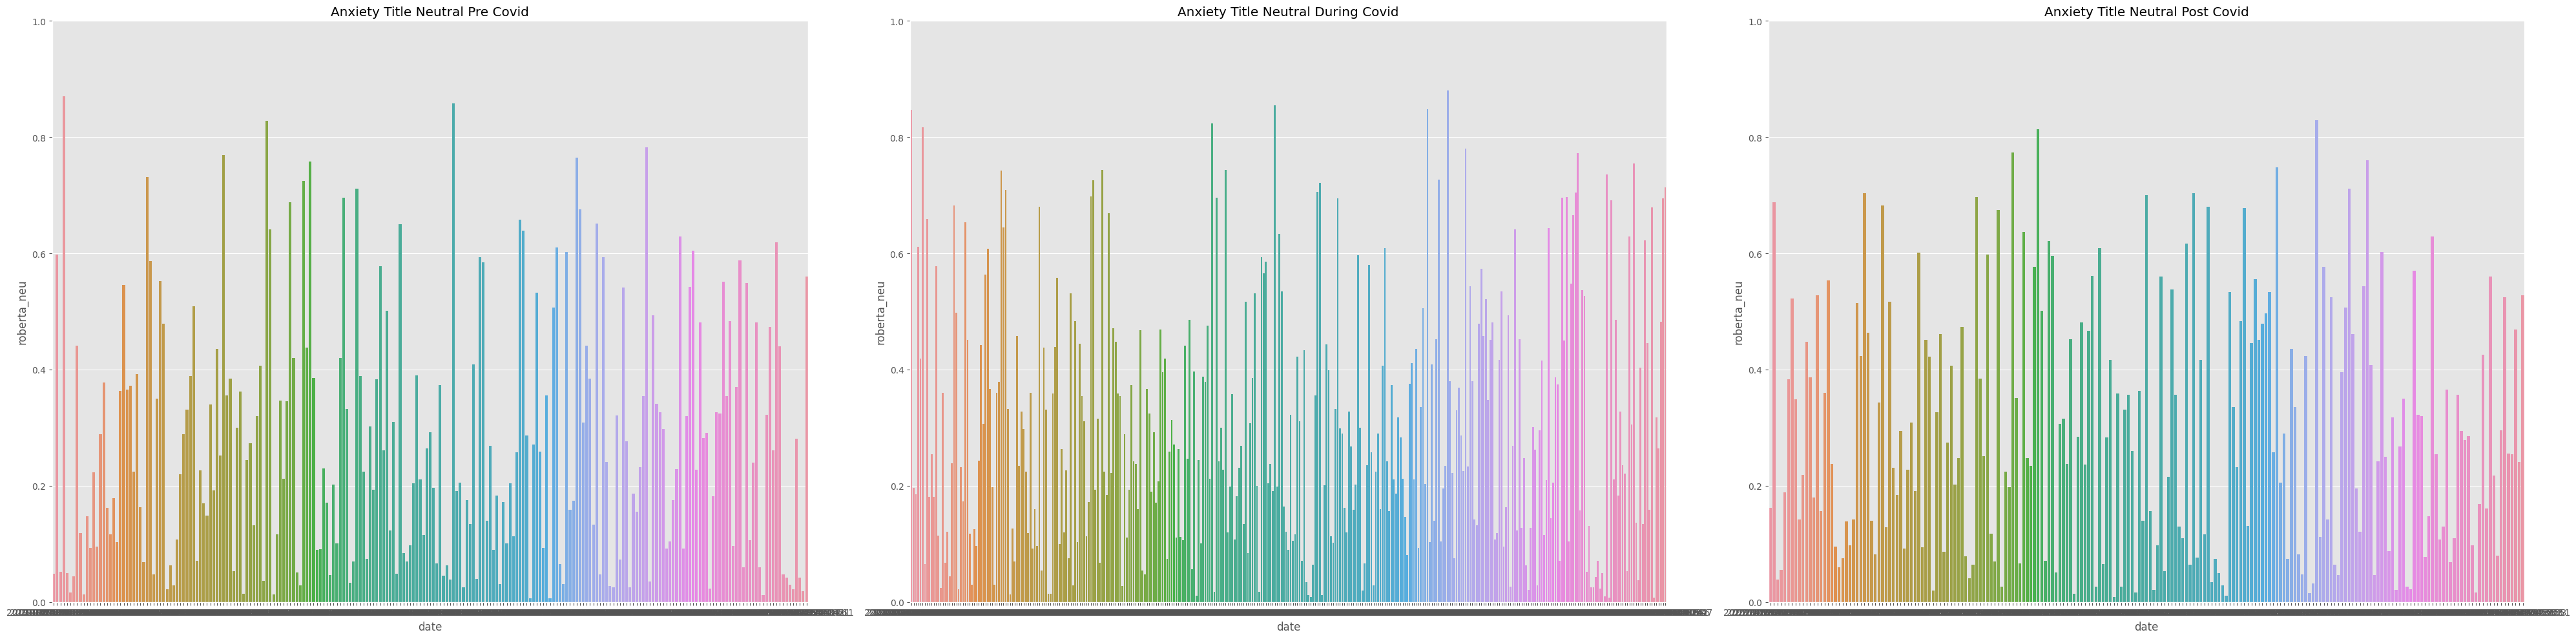

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preAnxietyTitleDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=duringAnxietyTitleDF, x='date', y='roberta_pos', ax=axs[1])
sns.barplot(data=postAnxietyTitleDF, x='date', y='roberta_pos', ax=axs[2])
axs[0].set_title('Anxiety Title Positive Pre Covid')
axs[1].set_title('Anxiety Title Positive During Covid')
axs[2].set_title('Anxiety Title Positive Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preAnxietyTitleDF, x='date', y='roberta_neg', ax=axs[0])
sns.barplot(data=duringAnxietyTitleDF, x='date', y='roberta_neg', ax=axs[1])
sns.barplot(data=postAnxietyTitleDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Anxiety Title Negative Pre Covid')
axs[1].set_title('Anxiety Title Negative During Covid')
axs[2].set_title('Anxiety Title Negative Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preAnxietyTitleDF, x='date', y='roberta_neu', ax=axs[0])
sns.barplot(data=duringAnxietyTitleDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=postAnxietyTitleDF, x='date', y='roberta_neu', ax=axs[2])
axs[0].set_title('Anxiety Title Neutral Pre Covid')
axs[1].set_title('Anxiety Title Neutral During Covid')
axs[2].set_title('Anxiety Title Neutral Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

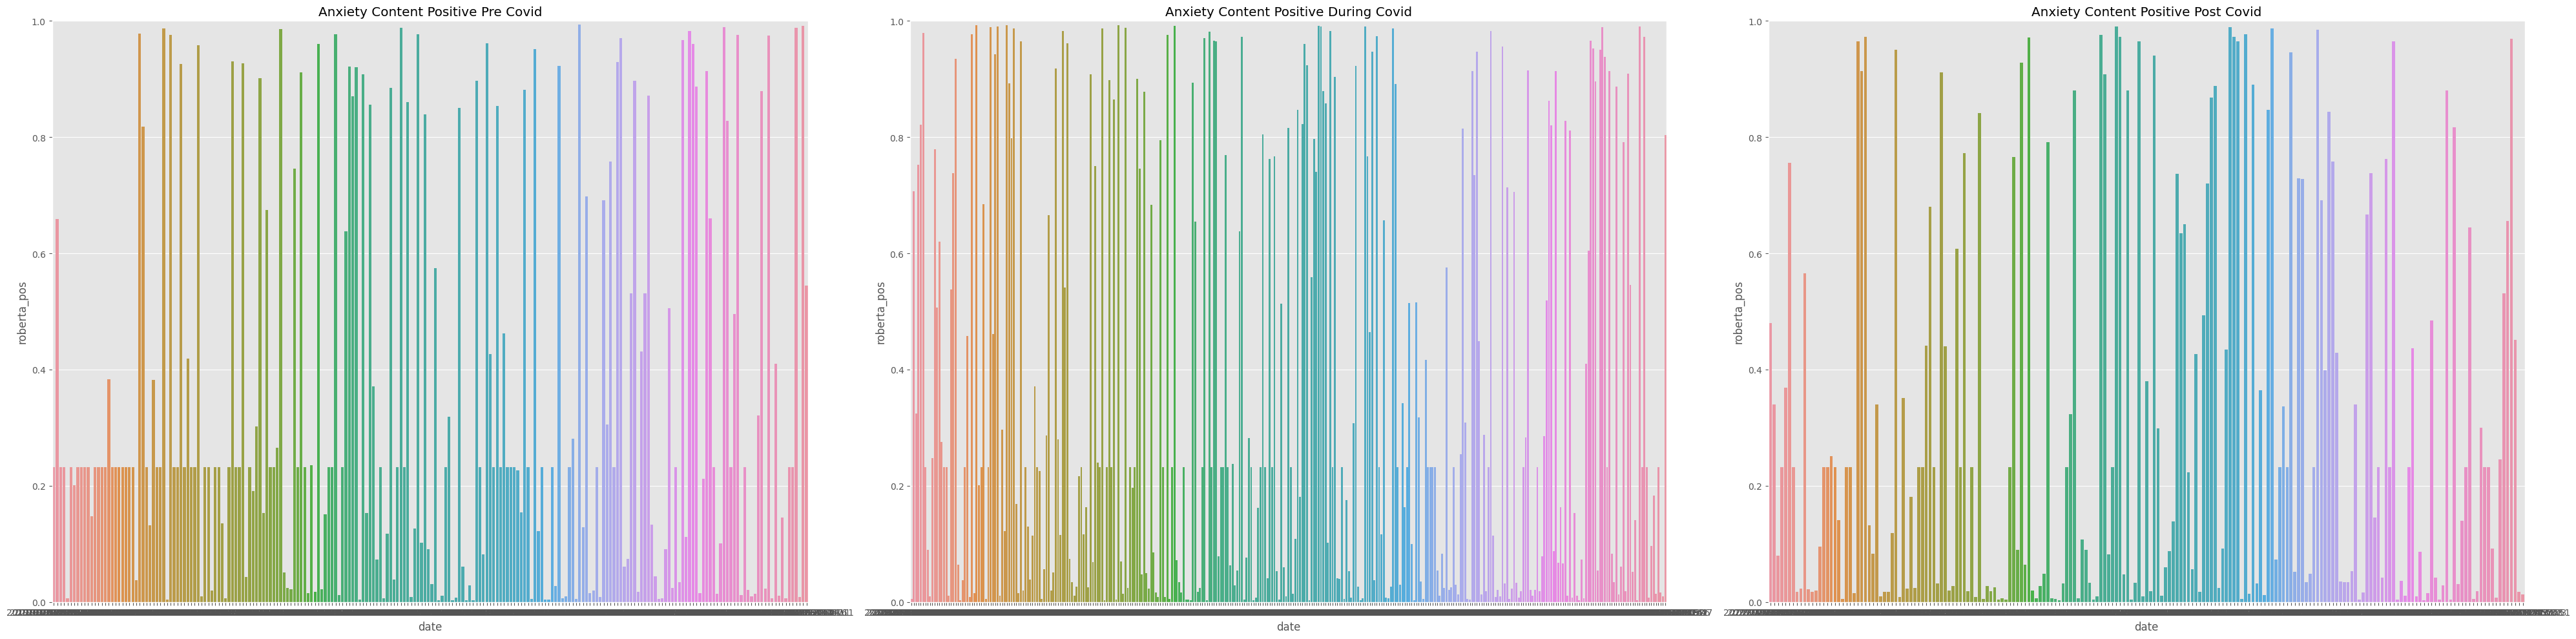

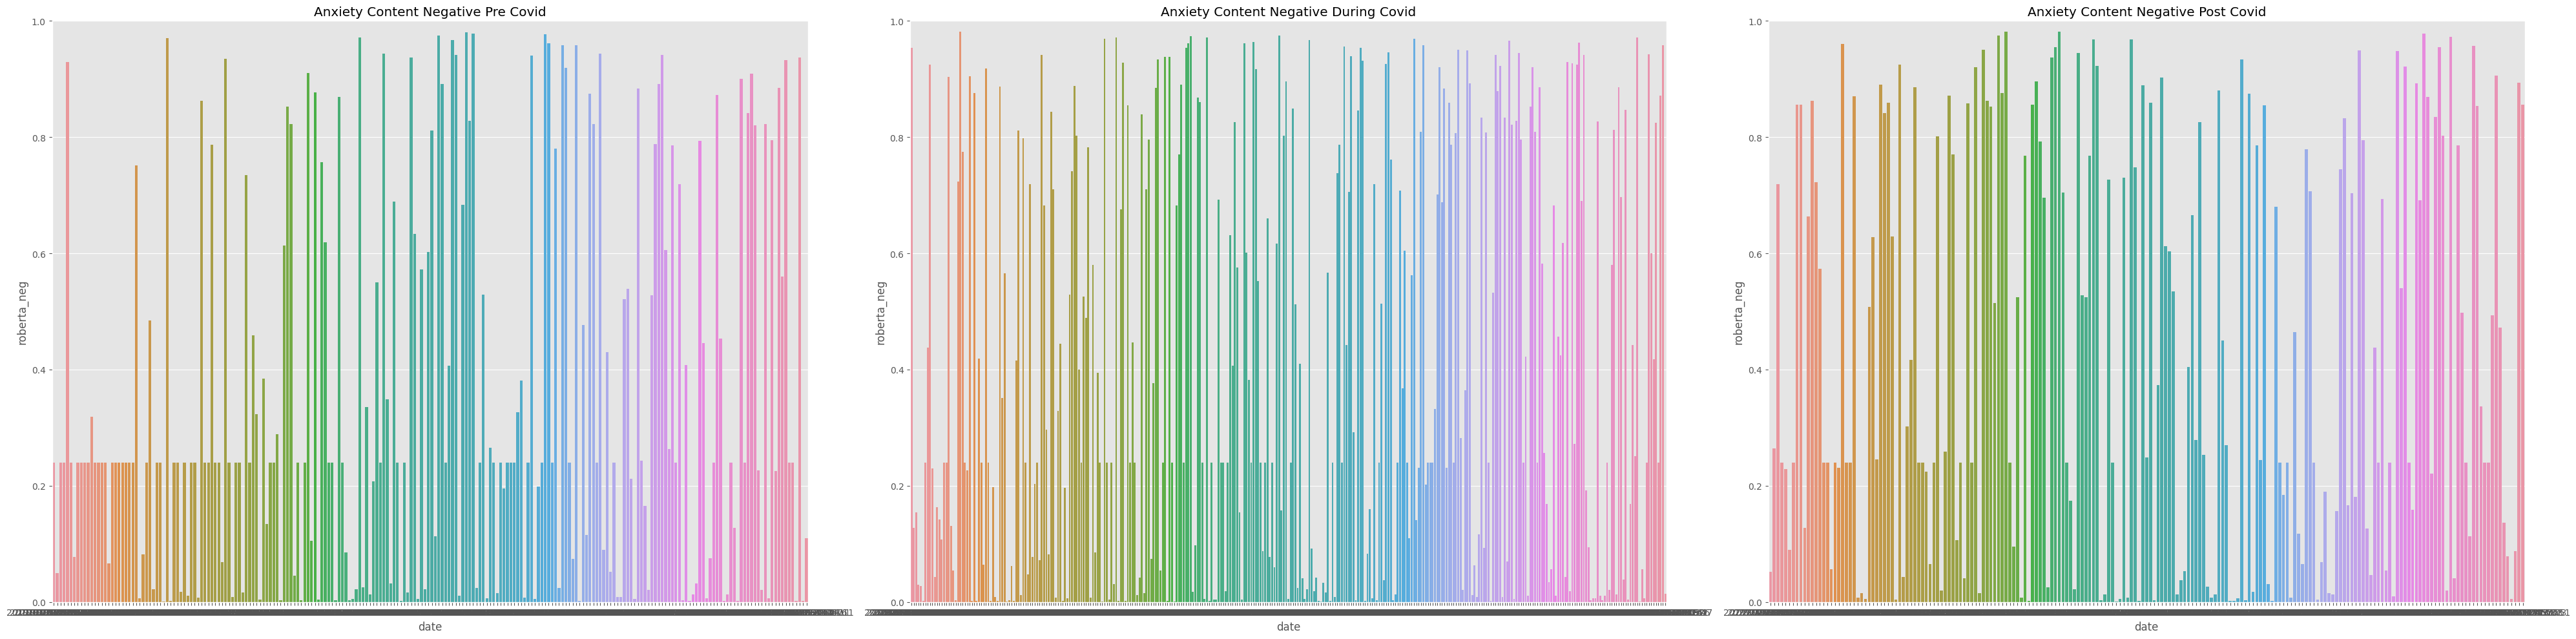

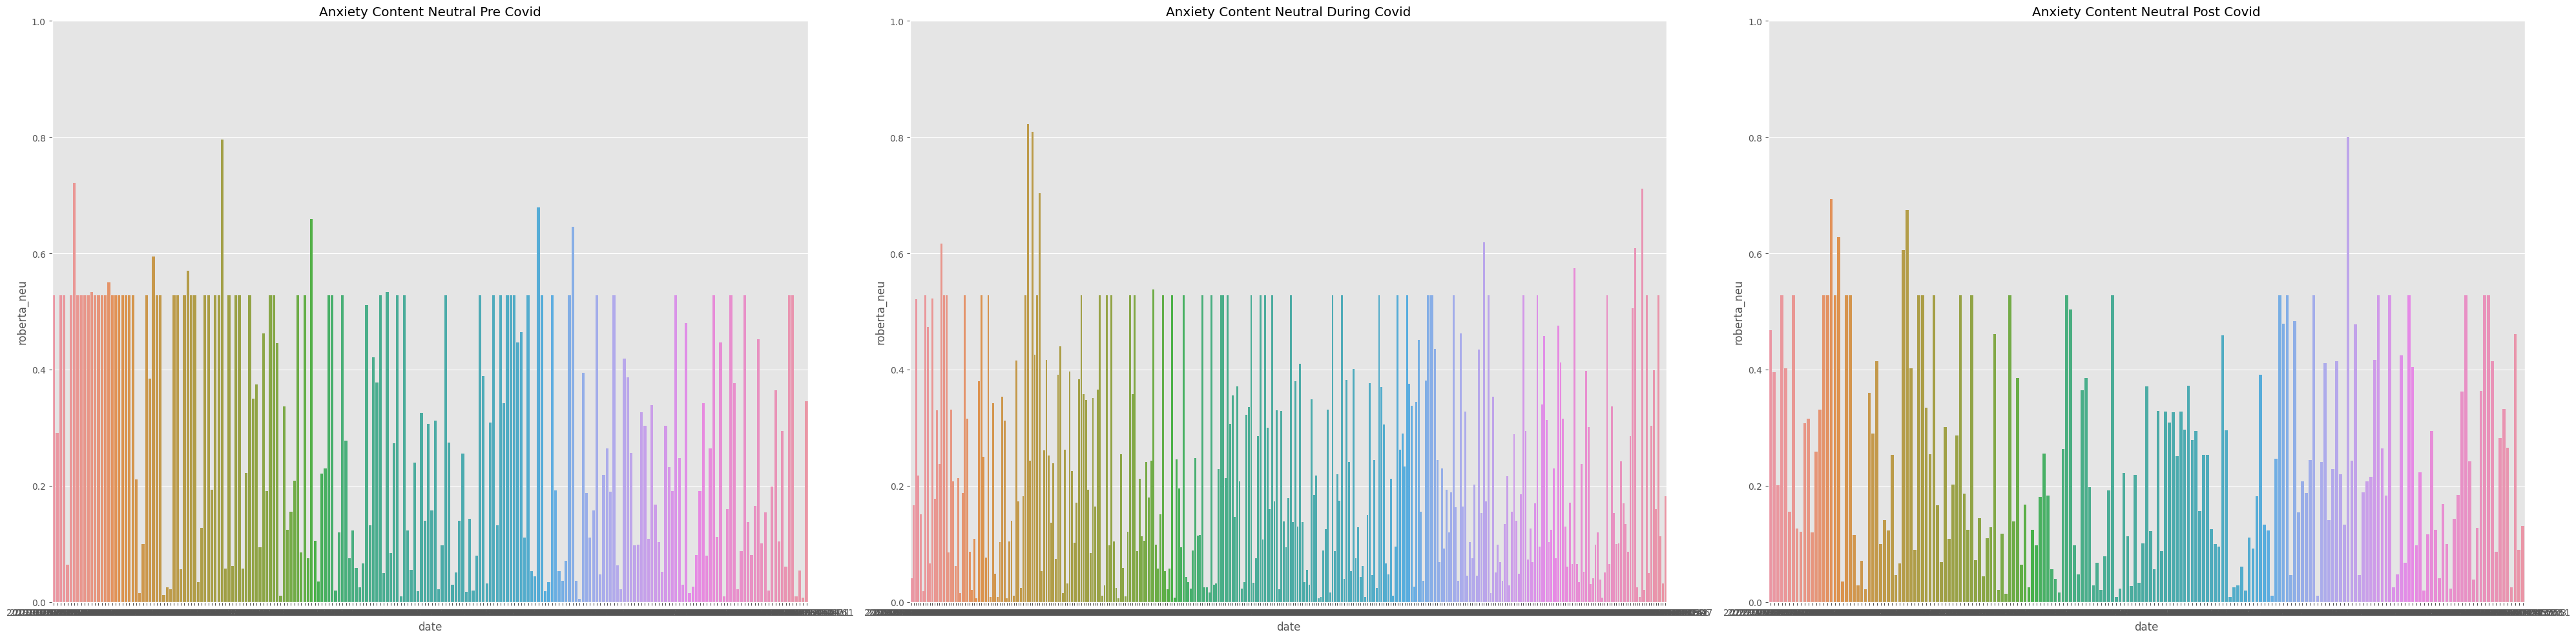

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preAnxietyContentDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=duringAnxietyContentDF, x='date', y='roberta_pos', ax=axs[1])
sns.barplot(data=postAnxietyContentDF, x='date', y='roberta_pos', ax=axs[2])
axs[0].set_title('Anxiety Content Positive Pre Covid')
axs[1].set_title('Anxiety Content Positive During Covid')
axs[2].set_title('Anxiety Content Positive Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preAnxietyContentDF, x='date', y='roberta_neg', ax=axs[0])
sns.barplot(data=duringAnxietyContentDF, x='date', y='roberta_neg', ax=axs[1])
sns.barplot(data=postAnxietyContentDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Anxiety Content Negative Pre Covid')
axs[1].set_title('Anxiety Content Negative During Covid')
axs[2].set_title('Anxiety Content Negative Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preAnxietyContentDF, x='date', y='roberta_neu', ax=axs[0])
sns.barplot(data=duringAnxietyContentDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=postAnxietyContentDF, x='date', y='roberta_neu', ax=axs[2])
axs[0].set_title('Anxiety Content Neutral Pre Covid')
axs[1].set_title('Anxiety Content Neutral During Covid')
axs[2].set_title('Anxiety Content Neutral Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

In [31]:
# Run for Roberta Model for DepressionRedditData Titles and Content
PreCovidDepressionRedditDataTitle = {}
PreCovidDepressionRedditDataContent = {}

DuringCovidDepressionRedditDataTitle = {}
DuringCovidDepressionRedditDataContent = {}

PostCovidDepressionRedditDataTitle = {}
PostCovidDepressionRedditDataContent = {}

AllDepressionRedditDataTitle = {}
AllDepressionRedditDataContent = {}

# for i, row in tqdm(AllAnxietyData.iterrows(), total=len(AllAnxietyData)):
#     try:
#         title = str(row['Title'])
#         AllAnxietyRedditDataTitle[i] = polarity_scores_roberta(title)
#     except RuntimeError:
#         print(f'Broke for Title id {i}')
#     try:
#         content = str(row['Content'])
#         AllAnxietyRedditDataContent[i] = polarity_scores_roberta(content)
#     except RuntimeError:
#         print(f'Broke for Content id {i}')

for i, row in tqdm(PreCovidDepressionRedditData.iterrows(), total=len(PreCovidDepressionRedditData)):
    try:
        preTitle = str(row['Title'])
        PreCovidDepressionRedditDataTitle[i] = polarity_scores_roberta(preTitle)
    except RuntimeError:
        print(f'Broke for Pre Title id {i}')
    try:
        preContent = str(row['Content'])
        PreCovidDepressionRedditDataContent[i] = polarity_scores_roberta(preContent)
    except RuntimeError:
        print(f'Broke for Pre Content id {i}')

for j, row in tqdm(DuringCovidDepressionRedditData.iterrows(), total=len(DuringCovidDepressionRedditData)):
    try:
        duringTitle = str(row['Title'])
        DuringCovidDepressionRedditDataTitle[j] = polarity_scores_roberta(duringTitle)
    except RuntimeError:
        print(f'Broke for During Title id {j}')
    try:
        duringContent = str(row['Content'])
        DuringCovidDepressionRedditDataContent[j] = polarity_scores_roberta(duringContent)
    except RuntimeError:
        print(f'Broke for During Content id {j}')

for k, row in tqdm(PostCovidDepressionRedditData.iterrows(), total=len(PostCovidDepressionRedditData)):
    try:
        postTitle = str(row['Title'])
        PostCovidDepressionRedditDataTitle[k] = polarity_scores_roberta(postTitle)
    except RuntimeError:
        print(f'Broke for Post Title id {k}')
    try:
        postContent = str(row['Content'])
        PostCovidDepressionRedditDataContent[k] = polarity_scores_roberta(postContent)
    except RuntimeError:
        print(f'Broke for Post Content id {k}')

  0%|          | 0/261 [00:00<?, ?it/s]

Broke for Pre Content id 54
Broke for Pre Content id 86
Broke for Pre Content id 104
Broke for Pre Content id 114
Broke for Pre Content id 138
Broke for Pre Content id 149
Broke for Pre Content id 241
Broke for Pre Content id 247
Broke for Pre Content id 252


  0%|          | 0/294 [00:00<?, ?it/s]

Broke for During Content id 15
Broke for During Content id 25
Broke for During Content id 28
Broke for During Content id 65
Broke for During Content id 77
Broke for During Content id 128
Broke for During Content id 135
Broke for During Content id 141
Broke for During Content id 179
Broke for During Content id 183
Broke for During Content id 197
Broke for During Content id 233
Broke for During Content id 241
Broke for During Content id 251
Broke for During Content id 277
Broke for During Content id 278


  0%|          | 0/191 [00:00<?, ?it/s]

Broke for Post Content id 51
Broke for Post Content id 67
Broke for Post Content id 76
Broke for Post Content id 78
Broke for Post Content id 90
Broke for Post Content id 109
Broke for Post Content id 111
Broke for Post Content id 134
Broke for Post Content id 151
Broke for Post Content id 160
Broke for Post Content id 170
Broke for Post Content id 171
Broke for Post Content id 175
Broke for Post Content id 178


In [32]:
preDepressionTitle = PreCovidDepressionRedditDataTitle
preDepressionContent = PreCovidDepressionRedditDataContent
preDepressionTitleDF = pd.DataFrame(preDepressionTitle).T
preDepressionContentDF = pd.DataFrame(preDepressionContent).T
preDepressionTitleDF = preDepressionTitleDF.reset_index().rename(columns={'index': 'ID'})
preDepressionContentDF = preDepressionContentDF.reset_index().rename(columns={'index': 'ID'})
preDepressionTitleDF = preDepressionTitleDF.merge(PreCovidDepressionRedditData, on='ID', how='left')
preDepressionContentDF = preDepressionContentDF.merge(PreCovidDepressionRedditData, on='ID', how='left')

duringDepressionTitle = DuringCovidDepressionRedditDataTitle
duringDepressionContent = DuringCovidDepressionRedditDataContent
duringDepressionTitleDF = pd.DataFrame(duringDepressionTitle).T
duringDepressionContentDF = pd.DataFrame(duringDepressionContent).T
duringDepressionTitleDF = duringDepressionTitleDF.reset_index().rename(columns={'index': 'ID'})
duringDepressionContentDF = duringDepressionContentDF.reset_index().rename(columns={'index': 'ID'})
duringDepressionTitleDF = duringDepressionTitleDF.merge(DuringCovidDepressionRedditData, on='ID', how='left')
duringDepressionContentDF = duringDepressionContentDF.merge(DuringCovidDepressionRedditData, on='ID', how='left')

postDepressionTitle = PostCovidDepressionRedditDataTitle
postDepressionContent = PostCovidDepressionRedditDataContent
postDepressionTitleDF = pd.DataFrame(postDepressionTitle).T
postDepressionContentDF = pd.DataFrame(postDepressionContent).T
postDepressionTitleDF = postDepressionTitleDF.reset_index().rename(columns={'index': 'ID'})
postDepressionContentDF = postDepressionContentDF.reset_index().rename(columns={'index': 'ID'})
postDepressionTitleDF = postDepressionTitleDF.merge(PostCovidDepressionRedditData, on='ID', how='left')
postDepressionContentDF = postDepressionContentDF.merge(PostCovidDepressionRedditData, on='ID', how='left')

preDepressionTitleDF.head()

,ID,roberta_neg,roberta_neu,roberta_pos,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.896736,0.093963,0.009301,depression,Shout out to the particular hell that is funct...,"This is me. Don’t get me wrong, it’s better th...",I know how you feel. I feel sad and hopeless m...,6676,197,2019-07-14 07:53:40,cd0hjp
1,1,0.787849,0.186441,0.025710,depression,If 10 years ago someone told me that in 10 yea...,"But here I am, 24 years old man and doing exac...",[deleted],4420,125,2019-07-12 13:36:38,ccaxvm
2,2,0.896426,0.094109,0.009465,depression,High-functioning depression: I feel like I'm l...,I read a lot of posts on here of people strugg...,This would be called Persistent Depressive Dis...,4089,200,2019-10-31 09:36:19,dpl4bu
3,3,0.946791,0.048215,0.004994,depression,I cried in front of my family today. They ende...,"Thank you, that really helps. Now I feel ten t...",That honestly sucks! I hate when parents do th...,4022,177,2019-10-07 15:35:16,del3c8
4,4,0.306125,0.650462,0.043412,depression,Does anyone else stay up super late to avoid t...,I don’t know if that makes sense. What I mean ...,"Yes, every day! It's the only thing exciting i...",3923,179,2019-03-26 05:40:19,b5lw5z


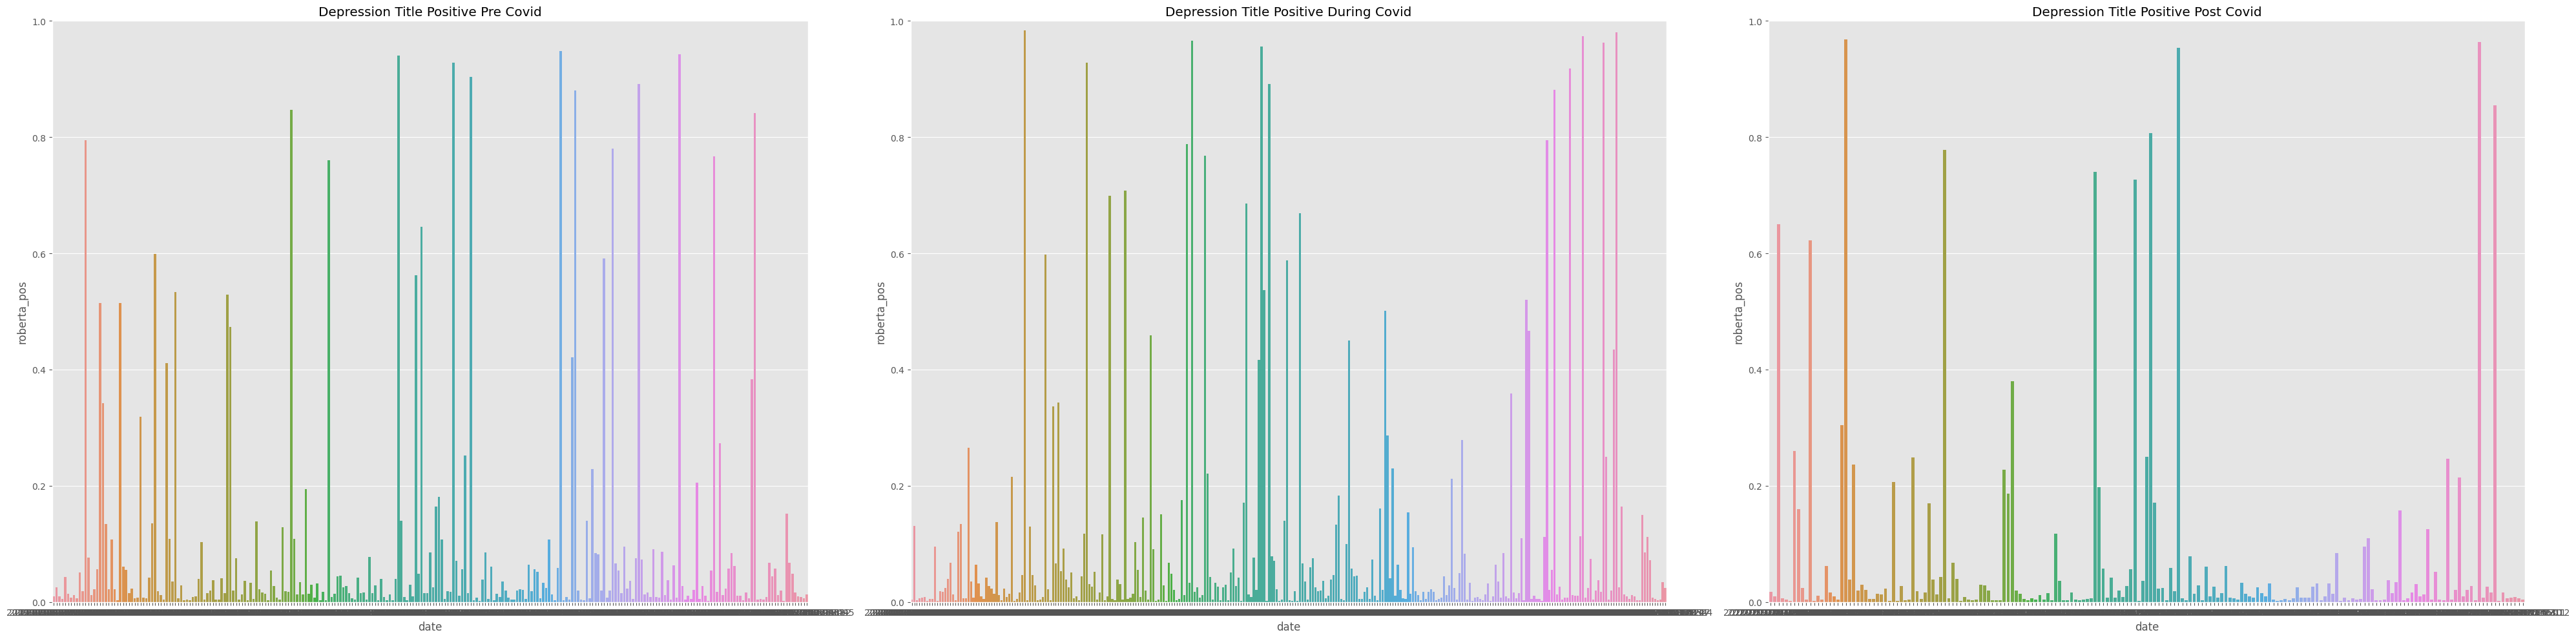

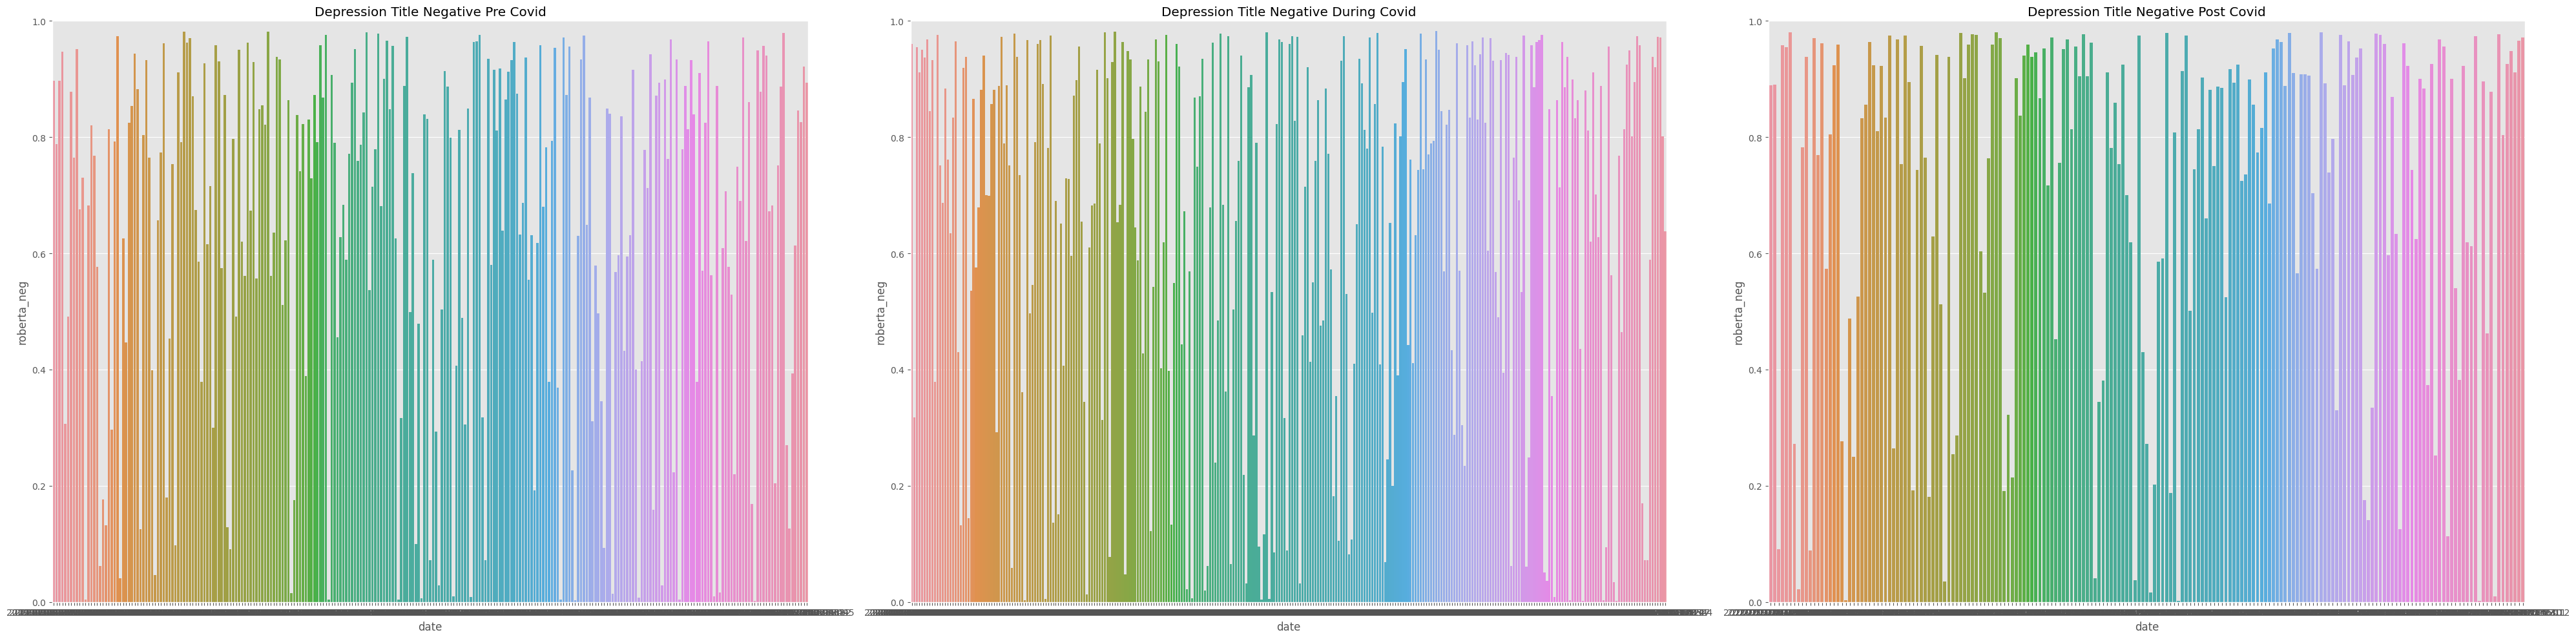

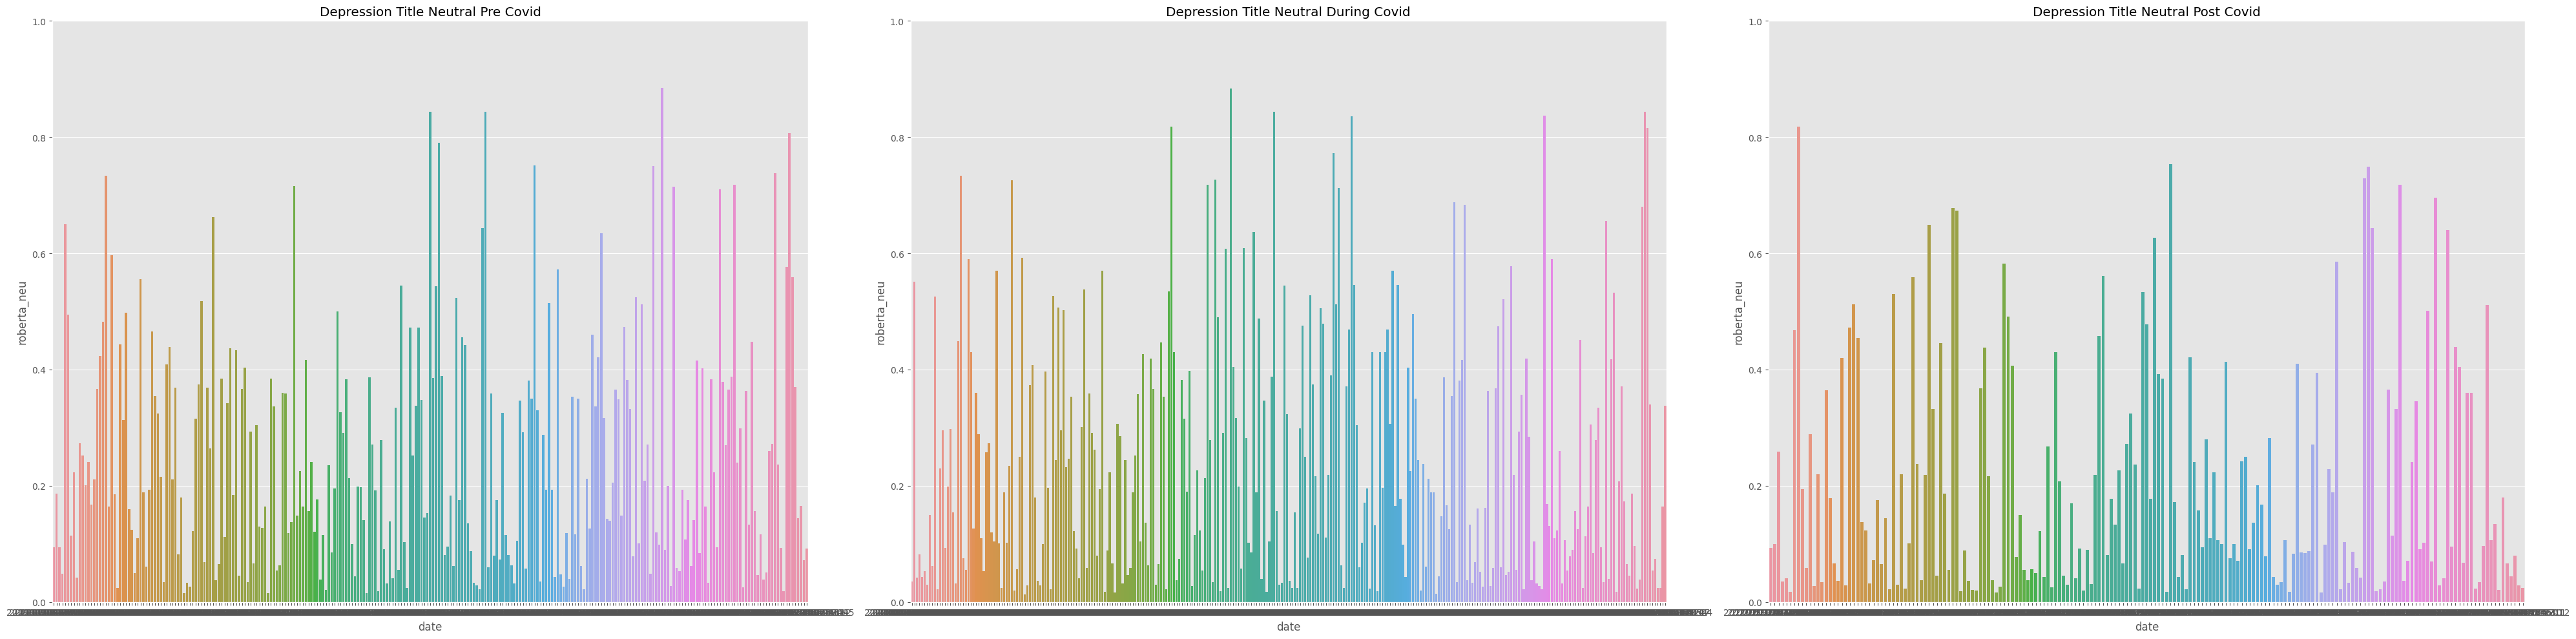

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preDepressionTitleDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=duringDepressionTitleDF, x='date', y='roberta_pos', ax=axs[1])
sns.barplot(data=postDepressionTitleDF, x='date', y='roberta_pos', ax=axs[2])
axs[0].set_title('Depression Title Positive Pre Covid')
axs[1].set_title('Depression Title Positive During Covid')
axs[2].set_title('Depression Title Positive Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preDepressionTitleDF, x='date', y='roberta_neg', ax=axs[0])
sns.barplot(data=duringDepressionTitleDF, x='date', y='roberta_neg', ax=axs[1])
sns.barplot(data=postDepressionTitleDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Depression Title Negative Pre Covid')
axs[1].set_title('Depression Title Negative During Covid')
axs[2].set_title('Depression Title Negative Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preDepressionTitleDF, x='date', y='roberta_neu', ax=axs[0])
sns.barplot(data=duringDepressionTitleDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=postDepressionTitleDF, x='date', y='roberta_neu', ax=axs[2])
axs[0].set_title('Depression Title Neutral Pre Covid')
axs[1].set_title('Depression Title Neutral During Covid')
axs[2].set_title('Depression Title Neutral Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

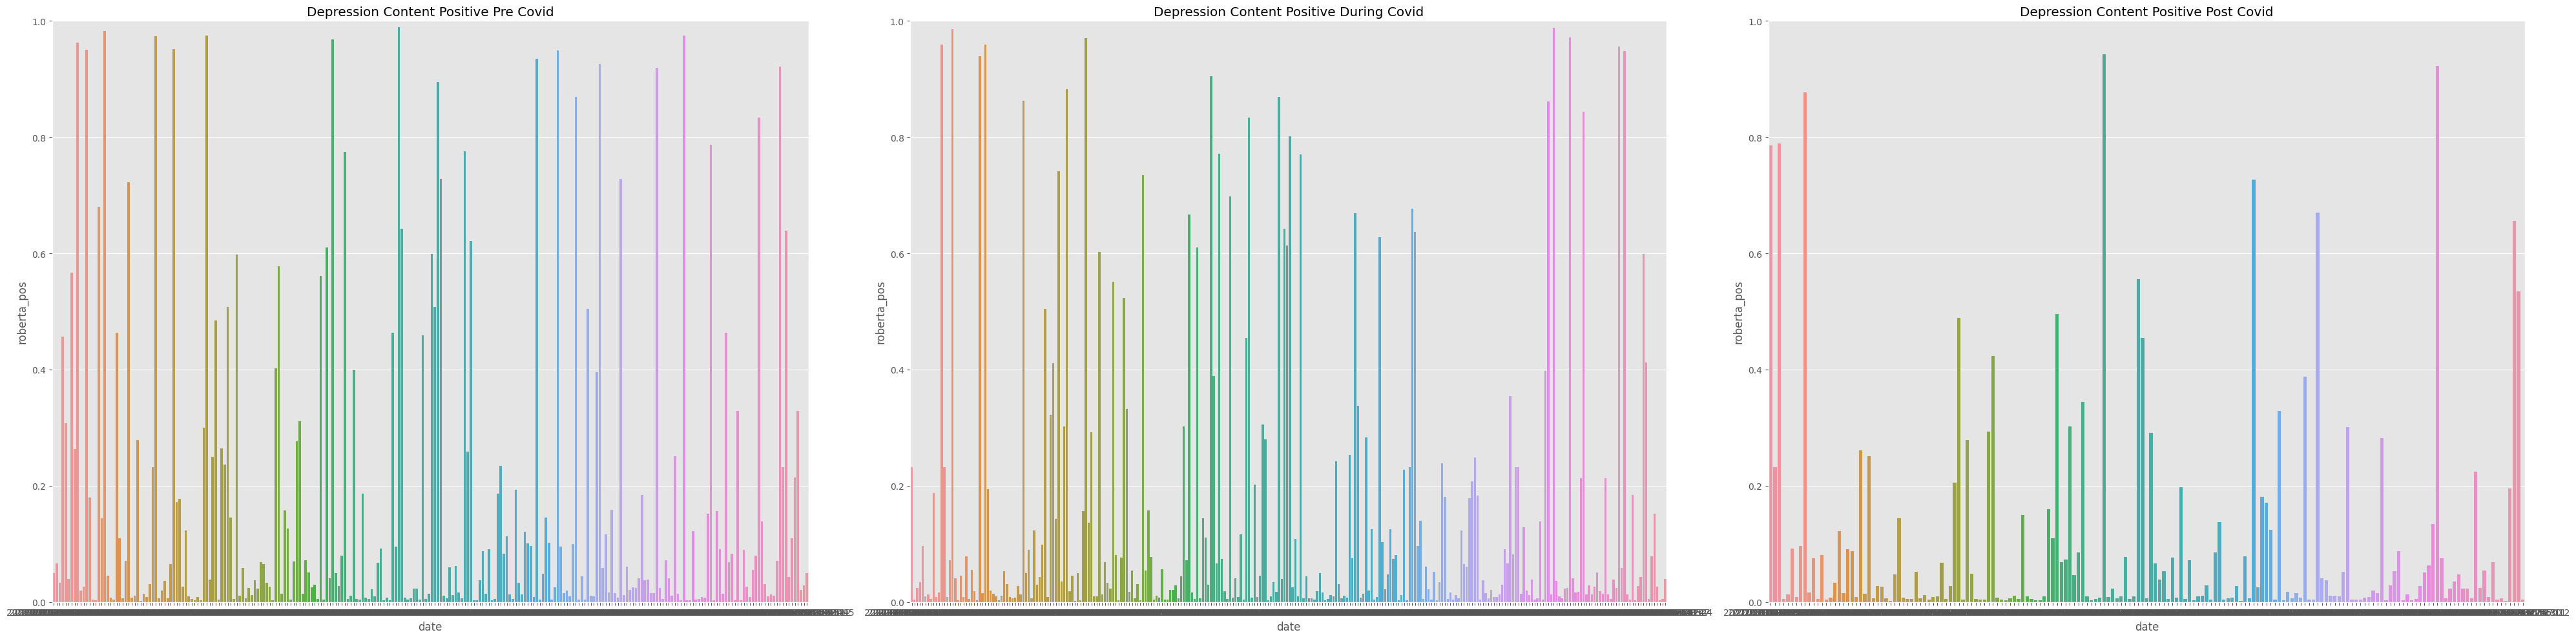

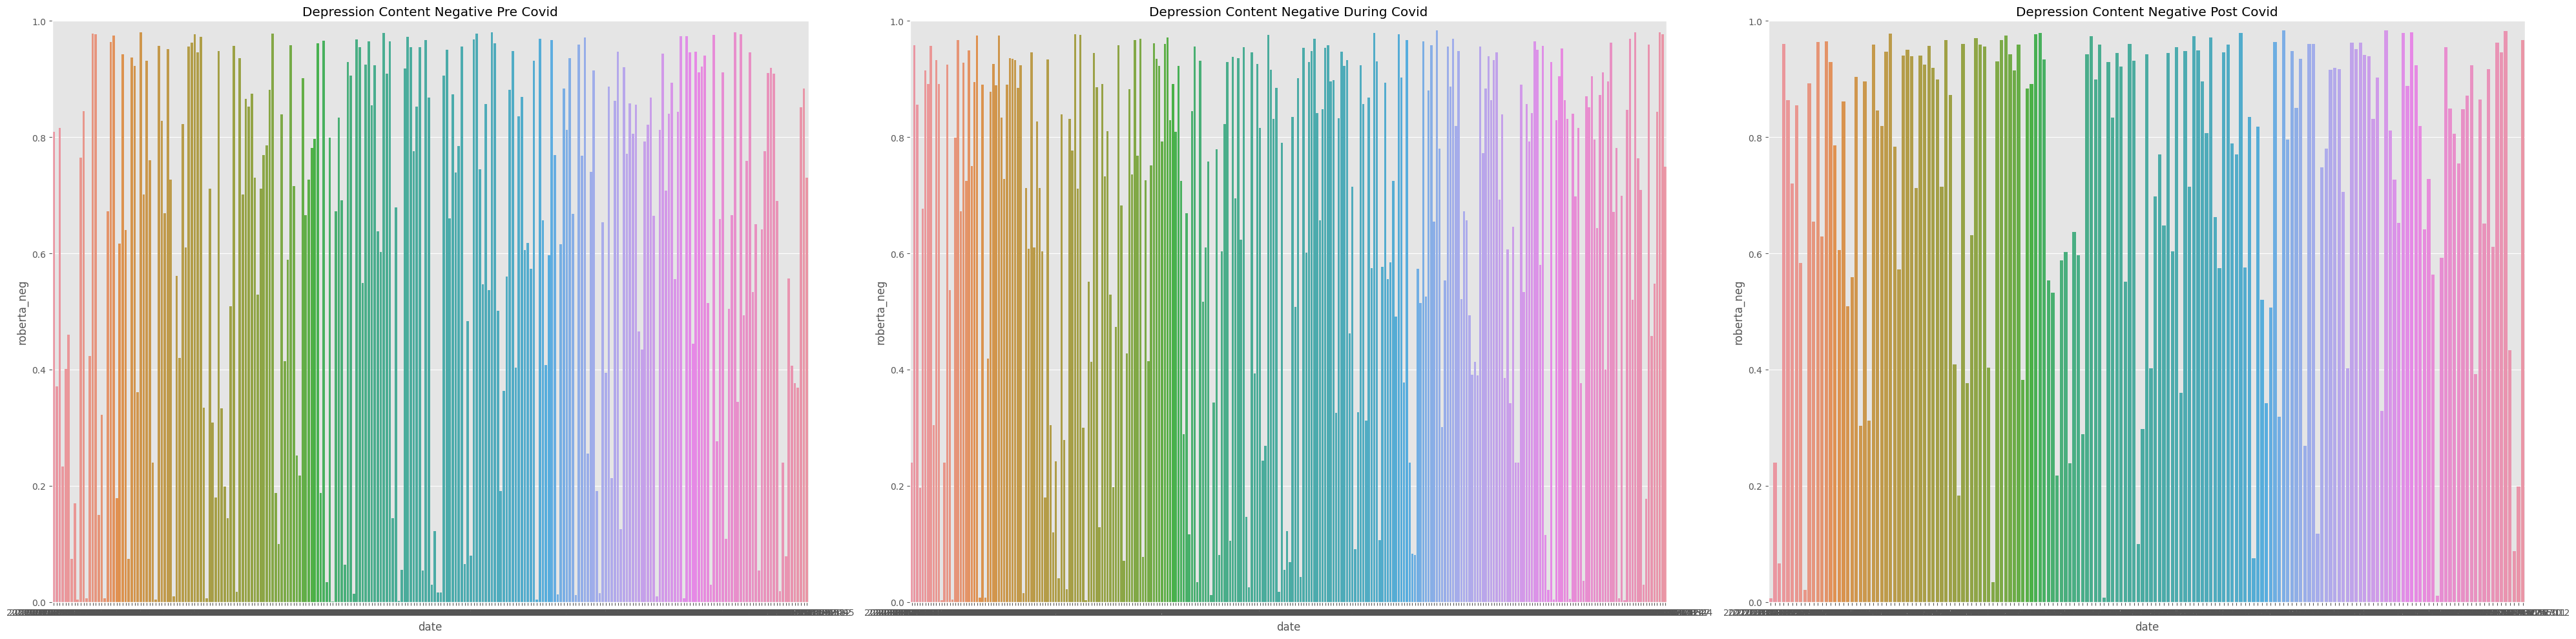

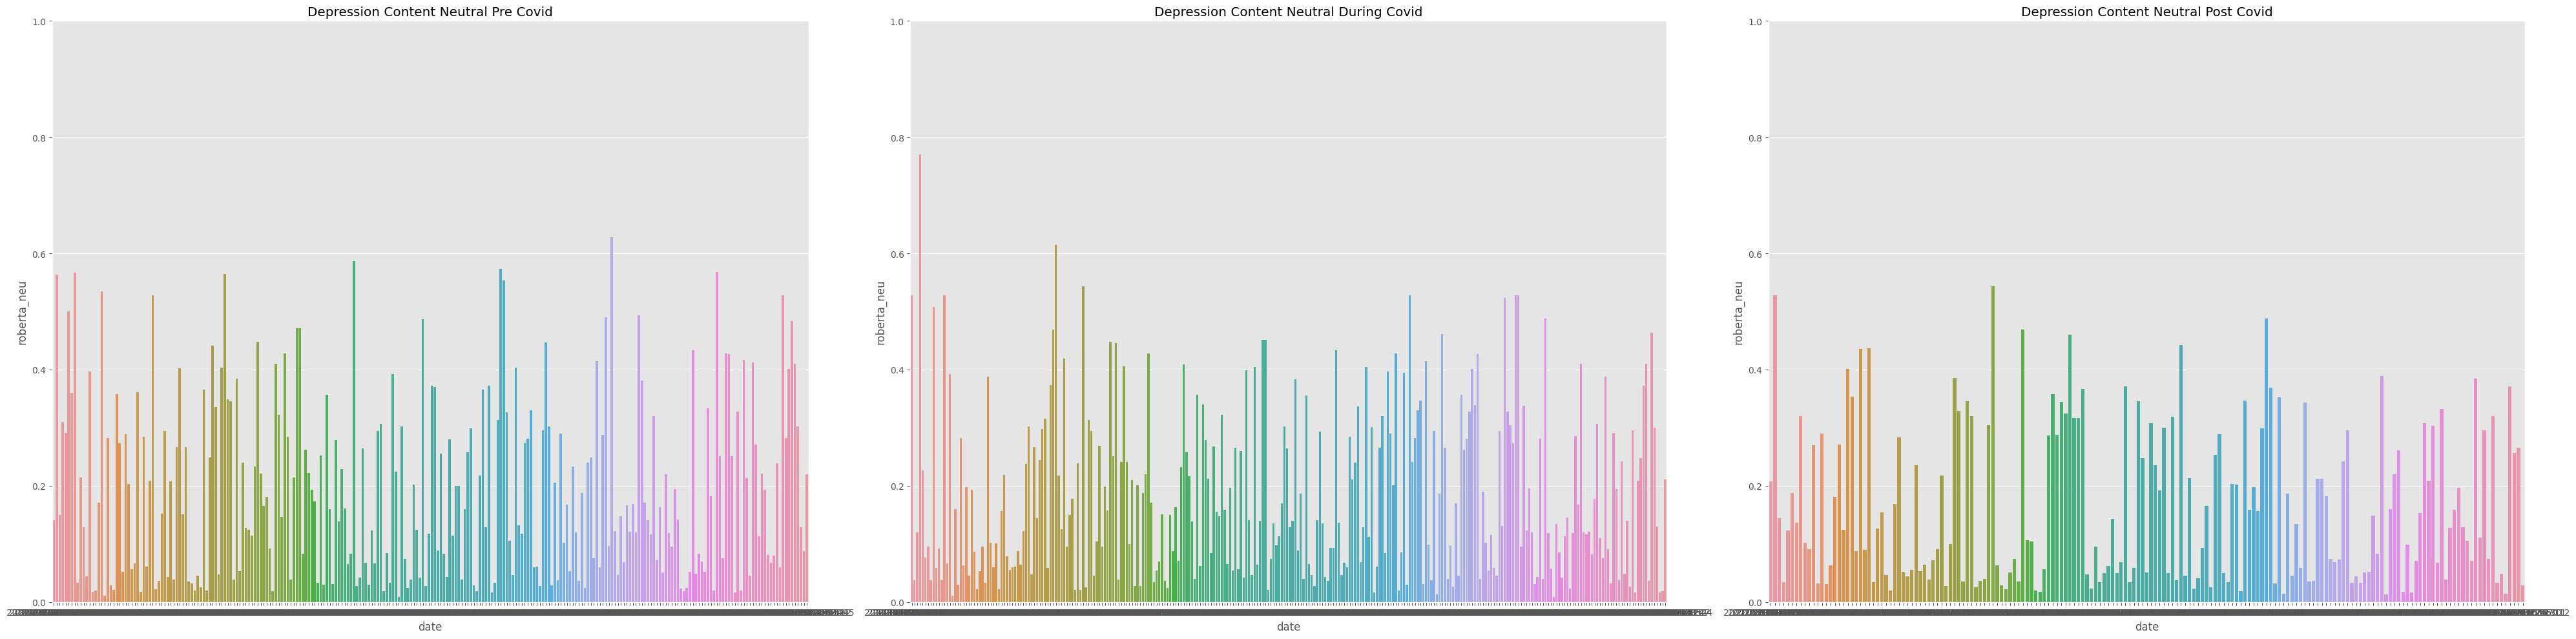

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preDepressionContentDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=duringDepressionContentDF, x='date', y='roberta_pos', ax=axs[1])
sns.barplot(data=postDepressionContentDF, x='date', y='roberta_pos', ax=axs[2])
axs[0].set_title('Depression Content Positive Pre Covid')
axs[1].set_title('Depression Content Positive During Covid')
axs[2].set_title('Depression Content Positive Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preDepressionContentDF, x='date', y='roberta_neg', ax=axs[0])
sns.barplot(data=duringDepressionContentDF, x='date', y='roberta_neg', ax=axs[1])
sns.barplot(data=postDepressionContentDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Depression Content Negative Pre Covid')
axs[1].set_title('Depression Content Negative During Covid')
axs[2].set_title('Depression Content Negative Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preDepressionContentDF, x='date', y='roberta_neu', ax=axs[0])
sns.barplot(data=duringDepressionContentDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=postDepressionContentDF, x='date', y='roberta_neu', ax=axs[2])
axs[0].set_title('Depression Content Neutral Pre Covid')
axs[1].set_title('Depression Content Neutral During Covid')
axs[2].set_title('Depression Content Neutral Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

In [35]:
# Run for Roberta Model for MentalHealthRedditData Titles and Content
PreCovidMentalHealthRedditDataTitle = {}
PreCovidMentalHealthRedditDataContent = {}

DuringCovidMentalHealthRedditDataTitle = {}
DuringCovidMentalHealthRedditDataContent = {}

PostCovidMentalHealthRedditDataTitle = {}
PostCovidMentalHealthRedditDataContent = {}

AllMentalHealthRedditDataTitle = {}
AllMentalHealthRedditDataContent = {}

# for i, row in tqdm(AllAnxietyData.iterrows(), total=len(AllAnxietyData)):
#     try:
#         title = str(row['Title'])
#         AllAnxietyRedditDataTitle[i] = polarity_scores_roberta(title)
#     except RuntimeError:
#         print(f'Broke for Title id {i}')
#     try:
#         content = str(row['Content'])
#         AllAnxietyRedditDataContent[i] = polarity_scores_roberta(content)
#     except RuntimeError:
#         print(f'Broke for Content id {i}')

for i, row in tqdm(PreCovidMentalHealthRedditData.iterrows(), total=len(PreCovidMentalHealthRedditData)):
    try:
        preTitle = str(row['Title'])
        PreCovidMentalHealthRedditDataTitle[i] = polarity_scores_roberta(preTitle)
    except RuntimeError:
        print(f'Broke for Pre Title id {i}')
    try:
        preContent = str(row['Content'])
        PreCovidMentalHealthRedditDataContent[i] = polarity_scores_roberta(preContent)
    except RuntimeError:
        print(f'Broke for Pre Content id {i}')

for j, row in tqdm(DuringCovidMentalHealthRedditData.iterrows(), total=len(DuringCovidMentalHealthRedditData)):
    try:
        duringTitle = str(row['Title'])
        DuringCovidMentalHealthRedditDataTitle[j] = polarity_scores_roberta(duringTitle)
    except RuntimeError:
        print(f'Broke for During Title id {j}')
    try:
        duringContent = str(row['Content'])
        DuringCovidMentalHealthRedditDataContent[j] = polarity_scores_roberta(duringContent)
    except RuntimeError:
        print(f'Broke for During Content id {j}')

for k, row in tqdm(PostCovidMentalHealthRedditData.iterrows(), total=len(PostCovidMentalHealthRedditData)):
    try:
        postTitle = str(row['Title'])
        PostCovidMentalHealthRedditDataTitle[k] = polarity_scores_roberta(postTitle)
    except RuntimeError:
        print(f'Broke for Post Title id {k}')
    try:
        postContent = str(row['Content'])
        PostCovidMentalHealthRedditDataContent[k] = polarity_scores_roberta(postContent)
    except RuntimeError:
        print(f'Broke for Post Content id {k}')

  0%|          | 0/206 [00:00<?, ?it/s]

Broke for Pre Content id 39
Broke for Pre Content id 60
Broke for Pre Content id 76
Broke for Pre Content id 99
Broke for Pre Content id 123
Broke for Pre Content id 133
Broke for Pre Content id 152
Broke for Pre Content id 153
Broke for Pre Content id 163
Broke for Pre Content id 185


  0%|          | 0/328 [00:00<?, ?it/s]

Broke for During Content id 0
Broke for During Content id 84
Broke for During Content id 118
Broke for During Content id 128
Broke for During Content id 133
Broke for During Content id 145
Broke for During Content id 146
Broke for During Content id 149
Broke for During Content id 163
Broke for During Content id 167
Broke for During Content id 187
Broke for During Content id 194
Broke for During Content id 214
Broke for During Content id 223
Broke for During Content id 246
Broke for During Content id 253
Broke for During Content id 261
Broke for During Content id 270
Broke for During Content id 280
Broke for During Content id 298
Broke for During Content id 310


  0%|          | 0/259 [00:00<?, ?it/s]

Broke for Post Content id 27
Broke for Post Content id 90
Broke for Post Content id 97
Broke for Post Content id 98
Broke for Post Content id 99
Broke for Post Content id 130
Broke for Post Content id 137
Broke for Post Content id 142
Broke for Post Content id 144
Broke for Post Content id 157
Broke for Post Content id 164
Broke for Post Content id 181
Broke for Post Content id 185
Broke for Post Content id 239
Broke for Post Content id 250
Broke for Post Content id 255


In [36]:
preMentalHealthTitle = PreCovidMentalHealthRedditDataTitle
preMentalHealthContent = PreCovidMentalHealthRedditDataContent
preMentalHealthTitleDF = pd.DataFrame(preMentalHealthTitle).T
preMentalHealthContentDF = pd.DataFrame(preMentalHealthContent).T
preMentalHealthTitleDF = preMentalHealthTitleDF.reset_index().rename(columns={'index': 'ID'})
preMentalHealthContentDF = preMentalHealthContentDF.reset_index().rename(columns={'index': 'ID'})
preMentalHealthTitleDF = preMentalHealthTitleDF.merge(PreCovidMentalHealthRedditData, on='ID', how='left')
preMentalHealthContentDF = preMentalHealthContentDF.merge(PreCovidMentalHealthRedditData, on='ID', how='left')

duringMentalHealthTitle = DuringCovidMentalHealthRedditDataTitle
duringMentalHealthContent = DuringCovidMentalHealthRedditDataContent
duringMentalHealthTitleDF = pd.DataFrame(duringMentalHealthTitle).T
duringMentalHealthContentDF = pd.DataFrame(duringMentalHealthContent).T
duringMentalHealthTitleDF = duringMentalHealthTitleDF.reset_index().rename(columns={'index': 'ID'})
duringMentalHealthContentDF = duringMentalHealthContentDF.reset_index().rename(columns={'index': 'ID'})
duringMentalHealthTitleDF = duringMentalHealthTitleDF.merge(DuringCovidMentalHealthRedditData, on='ID', how='left')
duringMentalHealthContentDF = duringMentalHealthContentDF.merge(DuringCovidMentalHealthRedditData, on='ID', how='left')

postMentalHealthTitle = PostCovidMentalHealthRedditDataTitle
postMentalHealthContent = PostCovidMentalHealthRedditDataContent
postMentalHealthTitleDF = pd.DataFrame(postMentalHealthTitle).T
postMentalHealthContentDF = pd.DataFrame(postMentalHealthContent).T
postMentalHealthTitleDF = postMentalHealthTitleDF.reset_index().rename(columns={'index': 'ID'})
postMentalHealthContentDF = postMentalHealthContentDF.reset_index().rename(columns={'index': 'ID'})
postMentalHealthTitleDF = postMentalHealthTitleDF.merge(PostCovidMentalHealthRedditData, on='ID', how='left')
postMentalHealthContentDF = postMentalHealthContentDF.merge(PostCovidMentalHealthRedditData, on='ID', how='left')

preMentalHealthTitleDF.head()

,ID,roberta_neg,roberta_neu,roberta_pos,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.106082,0.445556,0.448363,mentalhealth,"Not to brag, but instead of laying in bed ALL ...",NaN,"Honestly, I've found having a shower the most ...",2971,51,2019-04-15 19:13:30,bdk3xt
1,1,0.143866,0.421904,0.434230,mentalhealth,It’s been 2 months to the day since I last sel...,NaN,That's amazing!! Good job Im so happy for you ...,2020,159,2019-10-20 07:12:42,dkgcw0
2,2,0.067821,0.604655,0.327524,mentalhealth,I made a suicide scale. Hoping it could help o...,[suicide scale](https://emmengard.com/2019/05/...,"Living in states 8-9 for twelve years, I thoug...",1963,128,2019-05-07 22:40:26,blxcj7
3,3,0.409131,0.566876,0.023993,mentalhealth,To the person who deleted their post few minut...,I don't really know what's going on with you a...,"Upvoted this to make sure they see it, perhaps...",1356,11,2019-08-24 18:11:22,cuwwed
4,4,0.028931,0.226400,0.744669,mentalhealth,People who welcome you back with open arms aft...,Self isolation is horrific and that is all,"I have a friend I cancel on a lot, and he stil...",1026,25,2019-10-16 04:01:30,dijt4y


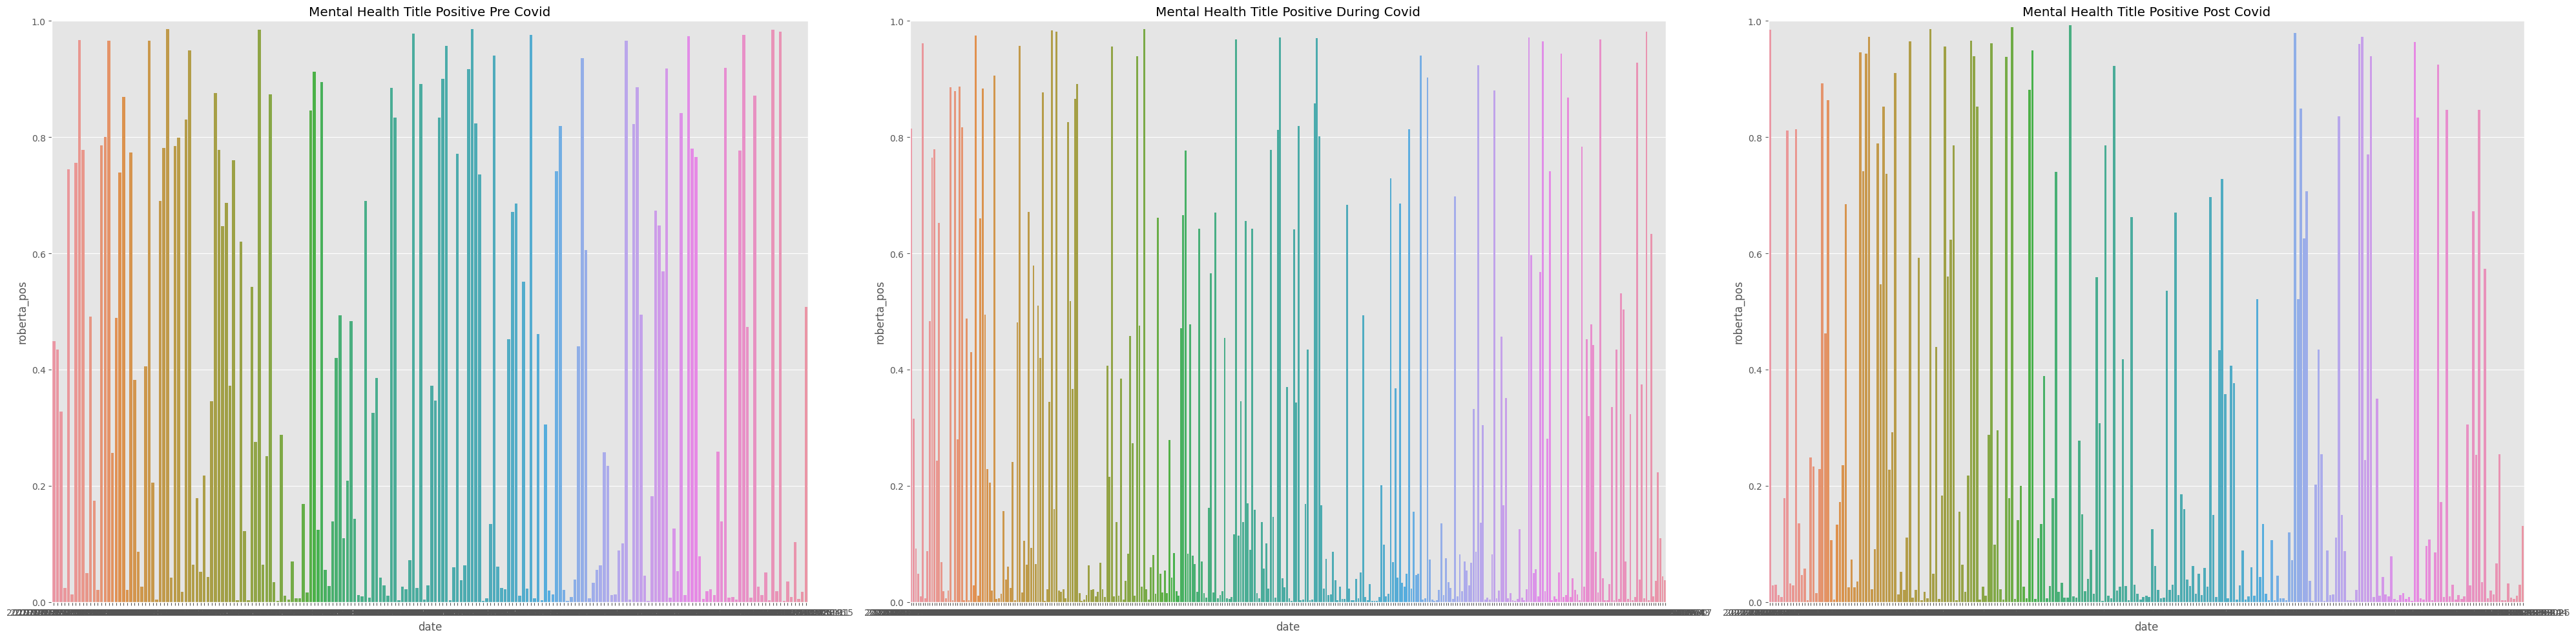

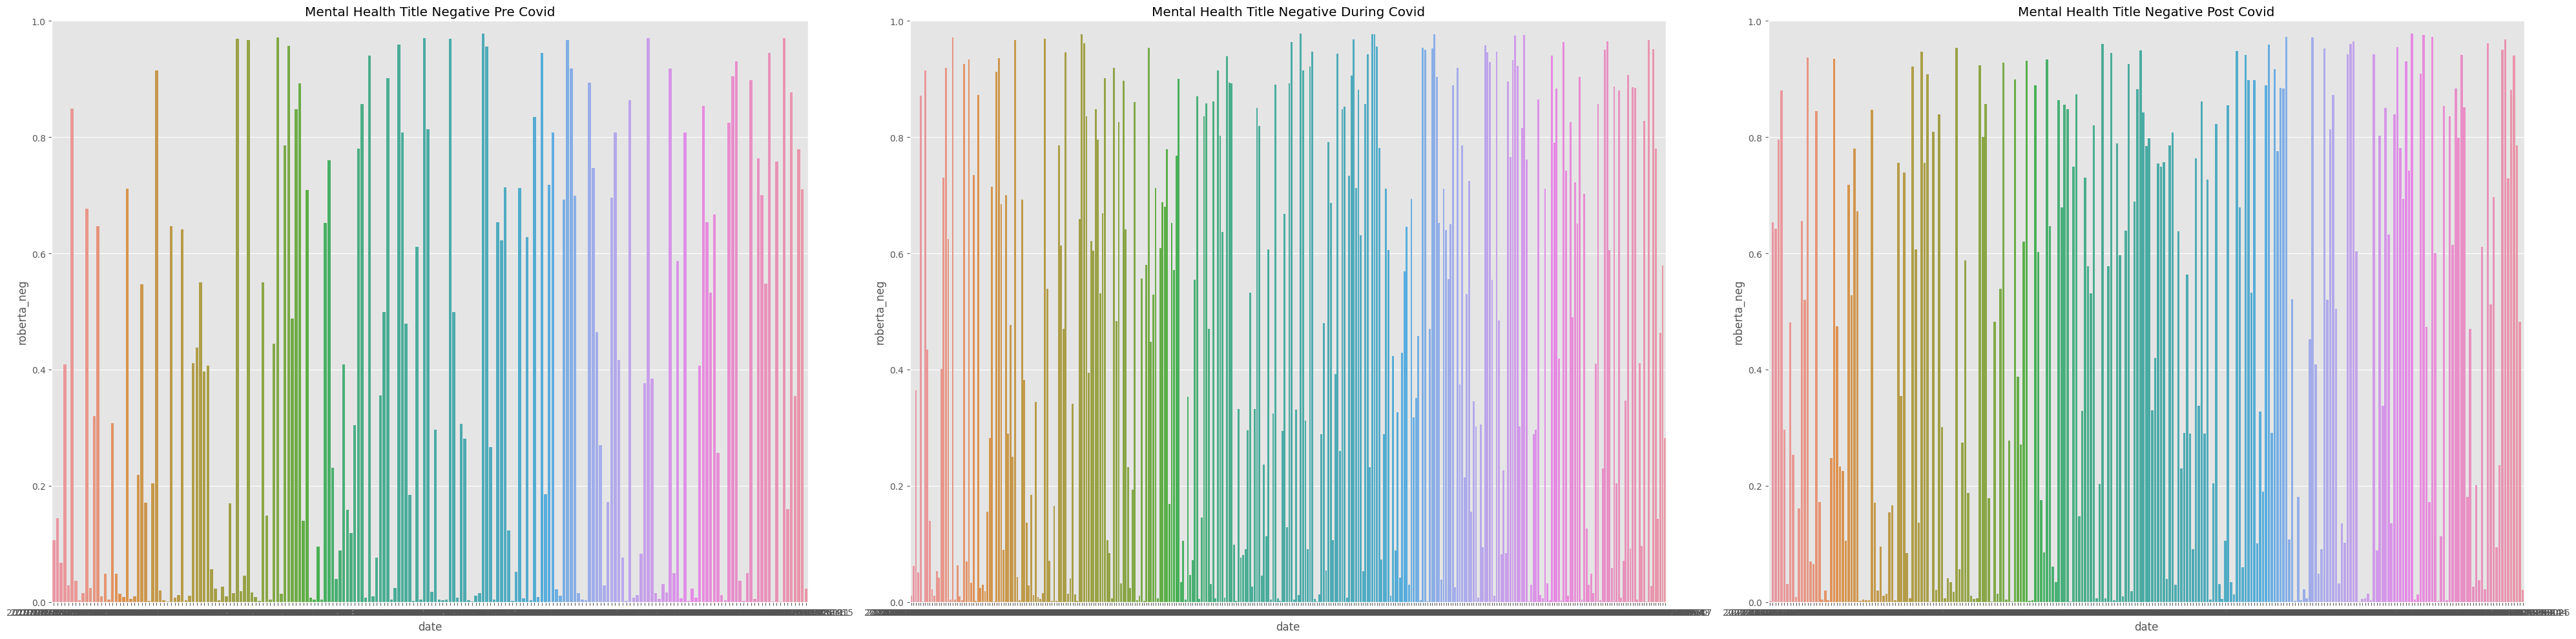

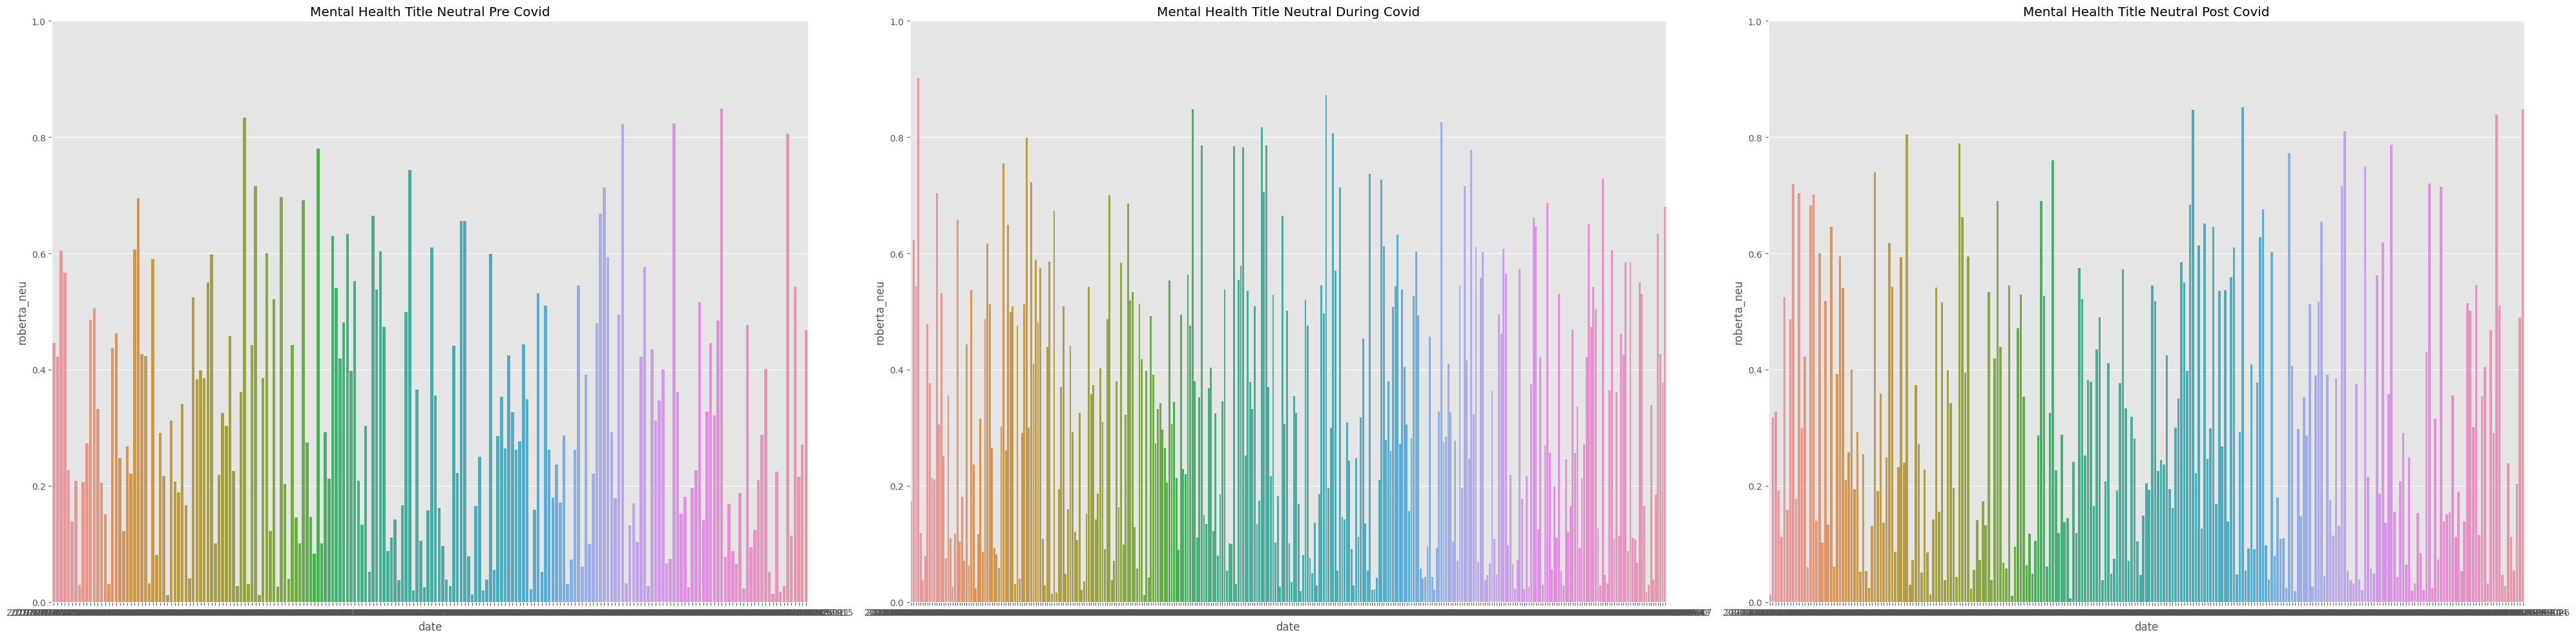

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preMentalHealthTitleDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=duringMentalHealthTitleDF, x='date', y='roberta_pos', ax=axs[1])
sns.barplot(data=postMentalHealthTitleDF, x='date', y='roberta_pos', ax=axs[2])
axs[0].set_title('Mental Health Title Positive Pre Covid')
axs[1].set_title('Mental Health Title Positive During Covid')
axs[2].set_title('Mental Health Title Positive Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preMentalHealthTitleDF, x='date', y='roberta_neg', ax=axs[0])
sns.barplot(data=duringMentalHealthTitleDF, x='date', y='roberta_neg', ax=axs[1])
sns.barplot(data=postMentalHealthTitleDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Mental Health Title Negative Pre Covid')
axs[1].set_title('Mental Health Title Negative During Covid')
axs[2].set_title('Mental Health Title Negative Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preMentalHealthTitleDF, x='date', y='roberta_neu', ax=axs[0])
sns.barplot(data=duringMentalHealthTitleDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=postMentalHealthTitleDF, x='date', y='roberta_neu', ax=axs[2])
axs[0].set_title('Mental Health Title Neutral Pre Covid')
axs[1].set_title('Mental Health Title Neutral During Covid')
axs[2].set_title('Mental Health Title Neutral Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

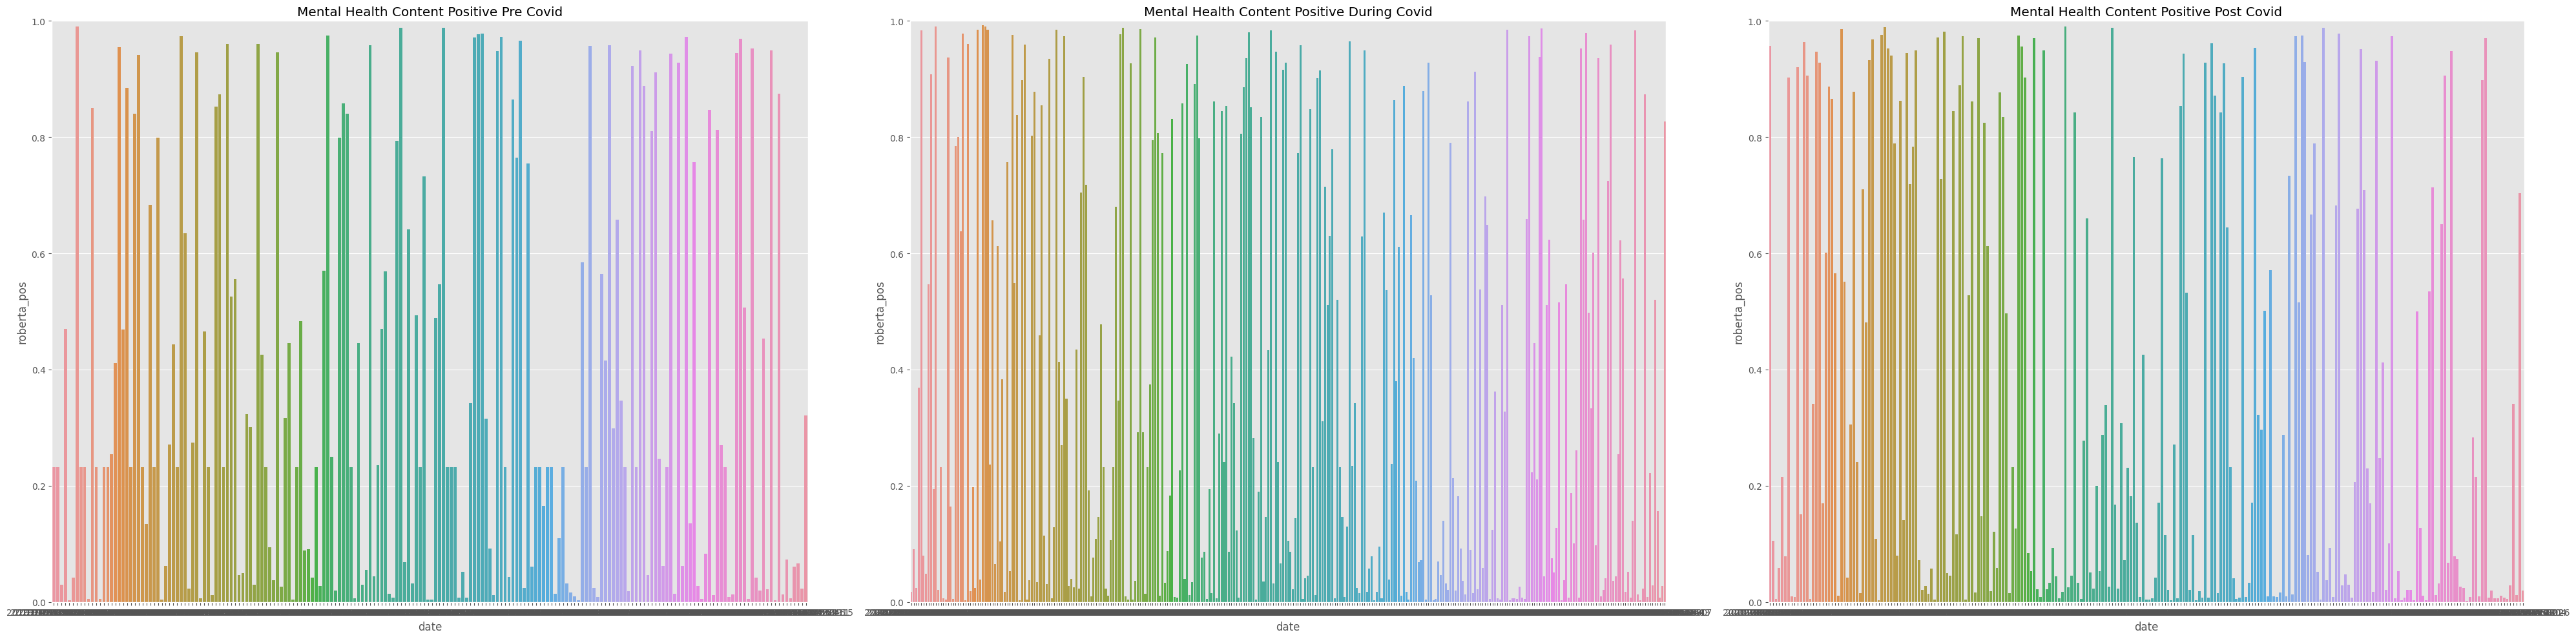

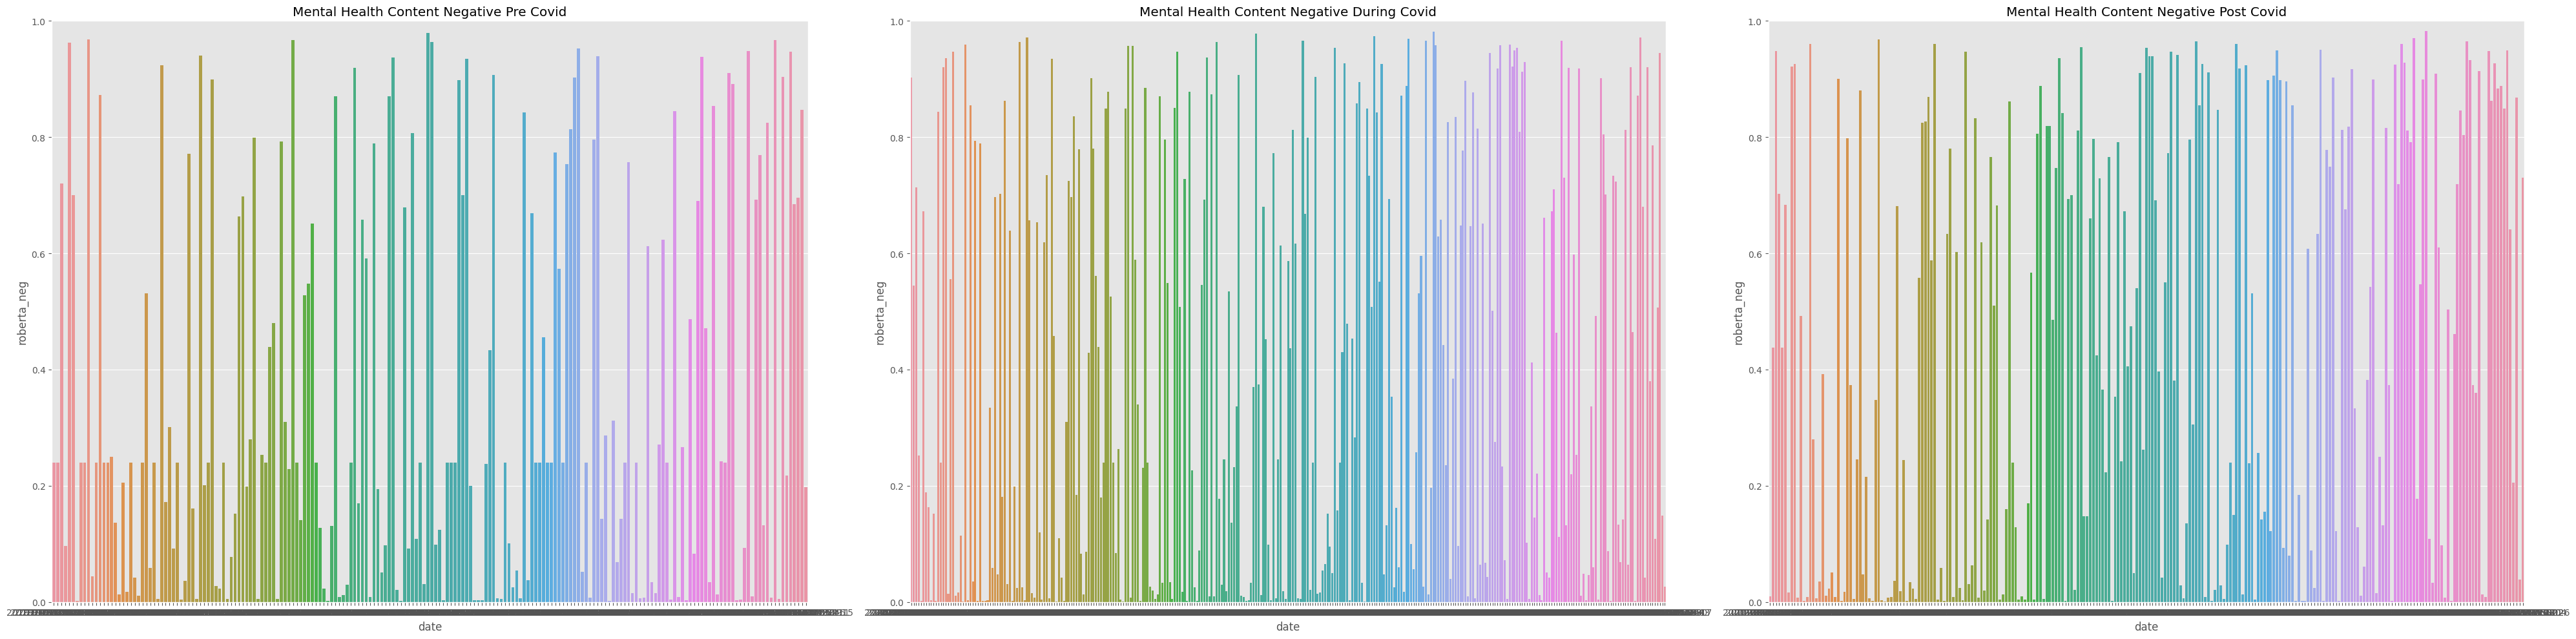

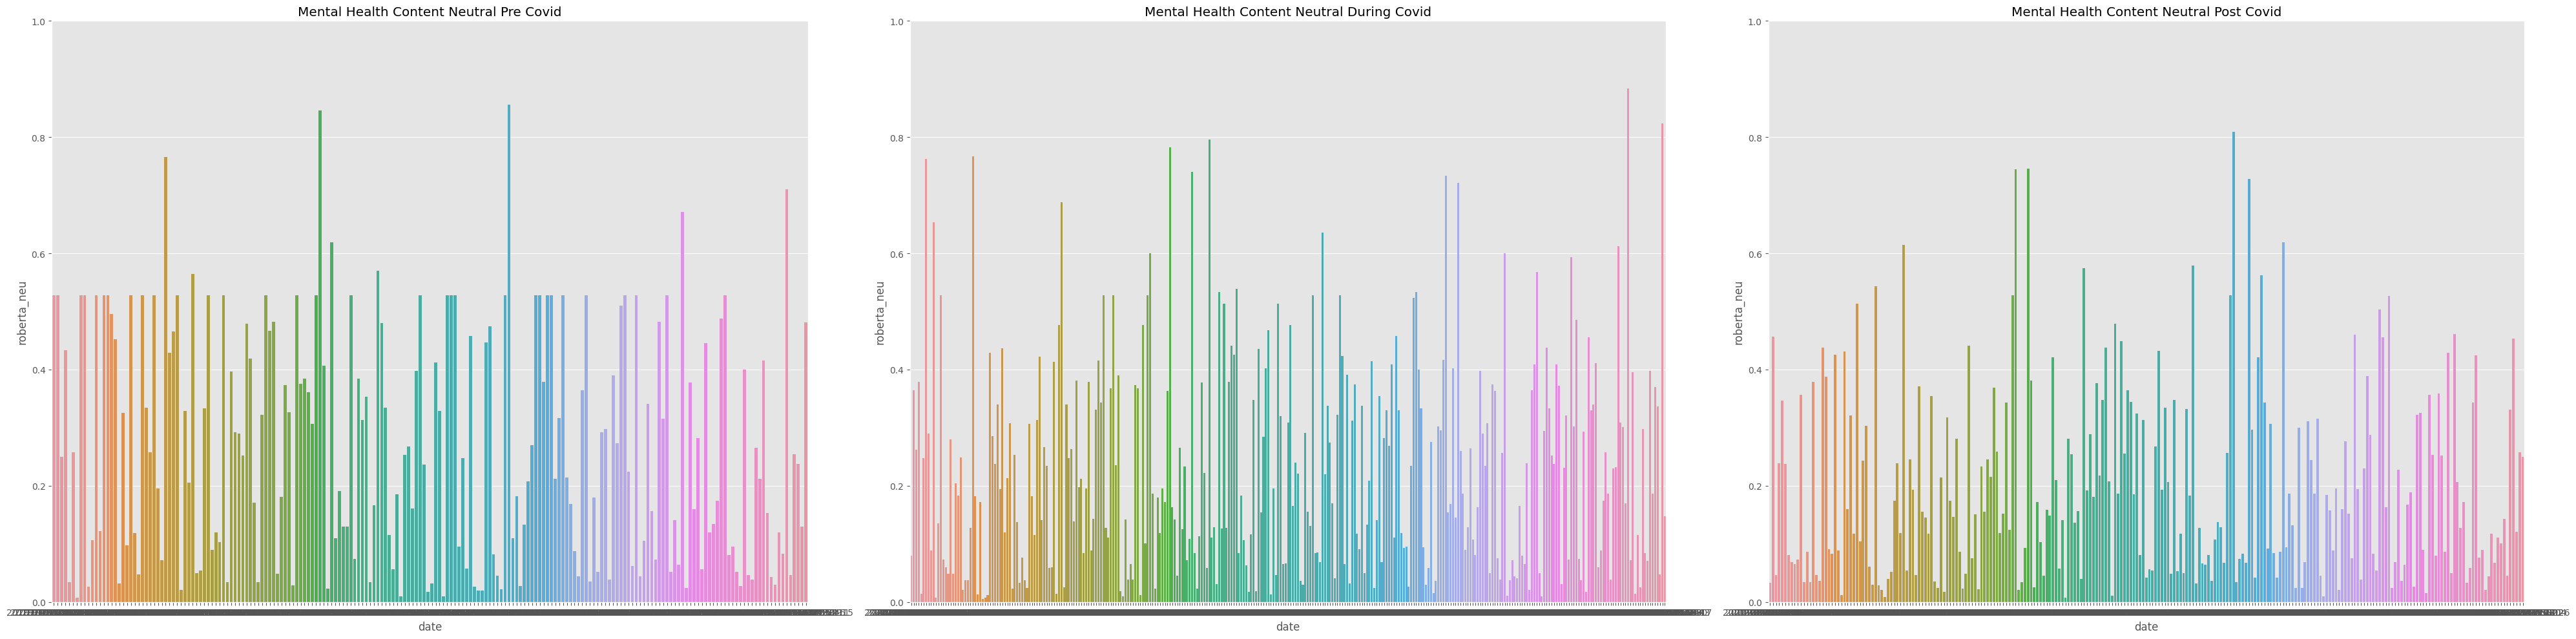

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preMentalHealthContentDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=duringMentalHealthContentDF, x='date', y='roberta_pos', ax=axs[1])
sns.barplot(data=postMentalHealthContentDF, x='date', y='roberta_pos', ax=axs[2])
axs[0].set_title('Mental Health Content Positive Pre Covid')
axs[1].set_title('Mental Health Content Positive During Covid')
axs[2].set_title('Mental Health Content Positive Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preMentalHealthContentDF, x='date', y='roberta_neg', ax=axs[0])
sns.barplot(data=duringMentalHealthContentDF, x='date', y='roberta_neg', ax=axs[1])
sns.barplot(data=postMentalHealthContentDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Mental Health Content Negative Pre Covid')
axs[1].set_title('Mental Health Content Negative During Covid')
axs[2].set_title('Mental Health Content Negative Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(40, 10))
sns.barplot(data=preMentalHealthContentDF, x='date', y='roberta_neu', ax=axs[0])
sns.barplot(data=duringMentalHealthContentDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=postMentalHealthContentDF, x='date', y='roberta_neu', ax=axs[2])
axs[0].set_title('Mental Health Content Neutral Pre Covid')
axs[1].set_title('Mental Health Content Neutral During Covid')
axs[2].set_title('Mental Health Content Neutral Post Covid')
axs[0].set_ylim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()